In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize
from wordcloud import WordCloud


In [ ]:
import pandas as pd
import numpy as np
import networkx
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pandas as pd

# Paths to the zip file and output TSV file
zip_file_path = "./reddit-depression-dataset.zip"
csv_file_name = "reddit_depression_dataset.csv"
tsv_file_path = "reddit_depression_dataset.tsv.gz"

# Unzip, read the CSV directly, and immediately save it as a compressed TSV
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        # Load CSV file into DataFrame directly from the unzipped content
        depression = pd.read_csv(csv_file)
        # Save as a compressed TSV file
        depression.to_csv(tsv_file_path, sep='\t', index=False, compression='gzip')

# Verify by reading the compressed TSV file and displaying columns
depression = pd.read_csv(tsv_file_path, sep='\t')
print(depression.head())


#compress the dataset
depression = pd.read_csv("merged.tsv.gz", sep='\t' , compression='gzip')
depression.head()



C:\Users\antot\AppData\Local\Temp\ipykernel_23080\4140509861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  depression = pd.read_csv("merged.tsv.gz", sep='\t' , compression='gzip')


,Unnamed: 0,subreddit,title,body,upvotes,num_comments,label,created_datetime,unique_id,cleaned_body
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,0,0.0,2014-07-14 03:35:09,0,start consider 99 underdog begin value start root
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1,0.0,2014-09-13 00:31:19,1,anyway human morality joke long abscence hope ...
2,47957,DeepThoughts,Rebirth!,Hello. I am the new guy in charge here (Beside...,6.0,1,0.0,2014-11-20 04:31:58,2,hello new guy charge besides thegood ofc bring...
3,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,4,0.0,2014-11-20 20:36:52,3,could take one cell body kill would still yet ...
4,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",8.0,23,0.0,2014-11-22 19:17:39,4,personally think infinite always grow


In [3]:
depression['subreddit'].unique()

array(['DeepThoughts', 'teenagers', '4.0', '32.0', '15', '23.0', '13.0',
       '8.0', '26.0', '6', '30', '5', '6.0', '11.0', '12', '16', '4',
       '61', '33.0', '10', '7', '7.0', '5.0', '15.0', '9', '29.0', '12.0',
       '17.0', '9.0', '8', '42.0', '107', '11', '10.0', '19.0', '18.0',
       'happy', '146.0', '25.0', '22.0', 'SuicideWatch', '1402326041',
       '16.0', 'depression', '14.0', '1375639264.0', '75.0', '31',
       '110.0', '103.0', '28.0', '101', '27', '1410731879.0', '52.0',
       '47', '57.0'], dtype=object)

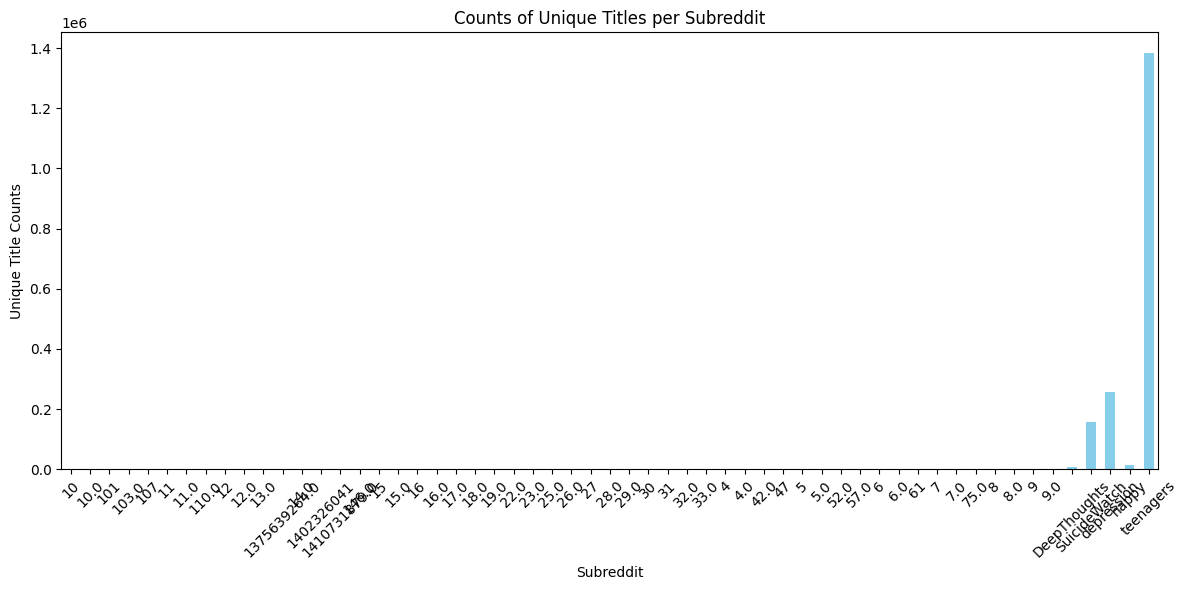

In [18]:
# Count occurrences of each unique title by subreddit
subreddit_title_counts = depression.groupby('subreddit')['title'].nunique()

# Create a barplot for subreddit title counts
plt.figure(figsize=(12, 6))
subreddit_title_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Unique Titles per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Unique Title Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [19]:
# Define the list of actual subreddit names you want to keep
valid_subreddits = [
    'DeepThoughts', 'teenagers', 'SuicideWatch', 'depression', 'happy'
    # Add any other subreddits you recognize as valid
]

# Filter the DataFrame to keep only rows with valid subreddit names
filtered_depression = depression[depression['subreddit'].isin(valid_subreddits)]

# Display unique subreddits in the filtered dataset to confirm
print("Unique subreddits after filtering:", filtered_depression['subreddit'].unique())


Unique subreddits after filtering: ['DeepThoughts' 'teenagers' 'happy' 'SuicideWatch' 'depression']


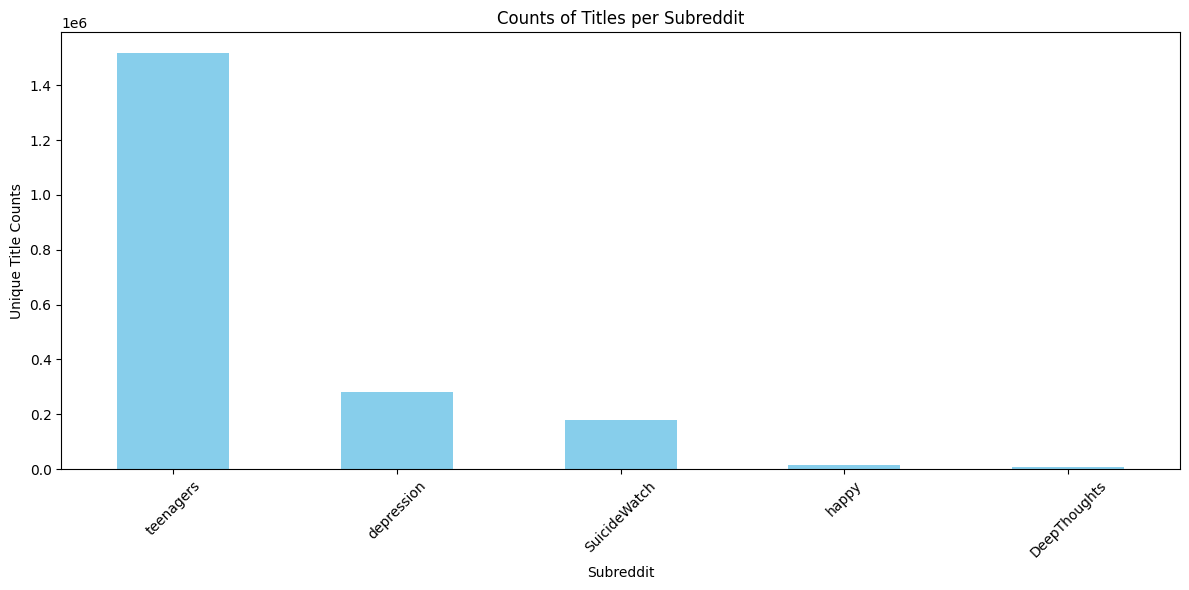

In [20]:
# Count occurrences of each unique title by subreddit
subreddit_title_counts = filtered_depression['subreddit'].value_counts()

# Create a barplot for subreddit title counts
plt.figure(figsize=(12, 6))
subreddit_title_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Titles per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Unique Title Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [7]:
filtered_depression['label'].value_counts()

label
0.0    1538934
1.0     461093
Name: count, dtype: int64

In [8]:
filtered_depression.isna().sum()

Unnamed: 0            0
subreddit             0
title                 2
body                  0
upvotes             184
num_comments          0
label               184
created_datetime    184
unique_id             0
cleaned_body          0
dtype: int64

In [21]:
depression = filtered_depression.drop(columns=['body', 'unique_id','Unnamed: 0'])


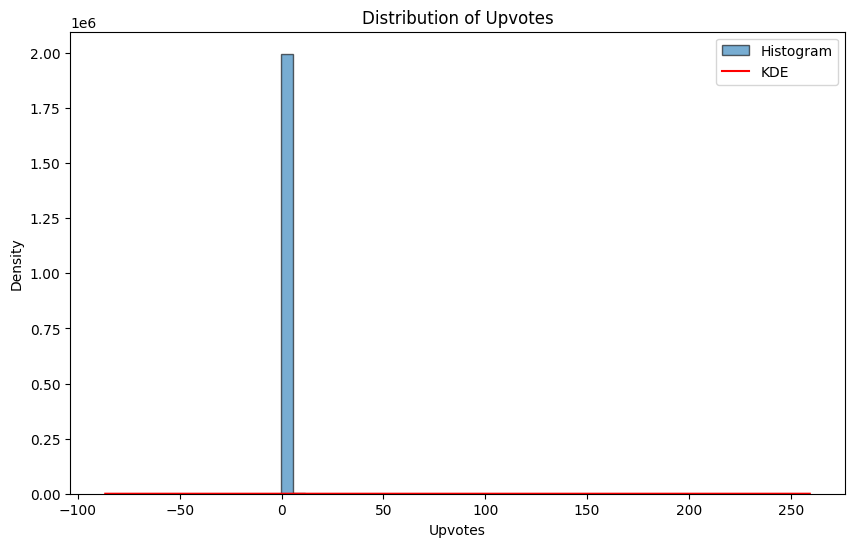

In [22]:

import pandas as pd
import matplotlib.pyplot as plt


# Drop NaN values in the upvotes column for plotting
upvotes = depression['upvotes'].dropna()

# Plotting the histogram and KDE
plt.figure(figsize=(10, 6))
plt.hist(upvotes, bins=30, alpha=0.6, edgecolor='black', label='Histogram')
upvotes.plot(kind='kde', color='red', label='KDE')

# Adding labels and title
plt.xlabel('Upvotes')
plt.ylabel('Density')
plt.title('Distribution of Upvotes')
plt.legend()

# Show the plot
plt.show()


In [23]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame
# Assuming it's already in a DataFrame called `df`

# Select relevant features for KNN imputation
# Convert categorical columns like 'subreddit' to dummy variables
df_encoded = pd.get_dummies(depression[['subreddit']], drop_first=True)

# Concatenate encoded features with numerical columns to create the KNN feature set
df_knn = pd.concat([depression[['upvotes', 'num_comments', 'label']], df_encoded], axis=1)

# Standardize the data to improve KNN performance
scaler = StandardScaler()
df_knn_scaled = pd.DataFrame(scaler.fit_transform(df_knn), columns=df_knn.columns)

# Apply KNN Imputer to fill NaN values in 'upvotes'
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = imputer.fit_transform(df_knn_scaled)

# Inverse scaling to get back to the original scale
df_knn_imputed = scaler.inverse_transform(df_knn_imputed)

# Update the original DataFrame with imputed values
depression['upvotes'] = df_knn_imputed[:, df_knn.columns.get_loc('upvotes')]

# Display the DataFrame to verify the imputed values
depression.head()


,subreddit,title,upvotes,num_comments,label,created_datetime,cleaned_body
0,DeepThoughts,Deep thoughts underdog,-0.053402,-0.209437,0.0,2014-07-14 03:35:09,start consider 99 underdog begin value start root
1,DeepThoughts,"I like this sub, there's only two posts yet I ...",-0.053402,-0.194279,0.0,2014-09-13 00:31:19,anyway human morality joke long abscence hope ...
2,DeepThoughts,Rebirth!,-0.050527,-0.194279,0.0,2014-11-20 04:31:58,hello new guy charge besides thegood ofc bring...
3,DeepThoughts,Who am I?,-0.051964,-0.148806,0.0,2014-11-20 20:36:52,could take one cell body kill would still yet ...
4,DeepThoughts,What is the limit of the knowledge and power a...,-0.047652,0.139190,0.0,2014-11-22 19:17:39,personally think infinite always grow


In [24]:
depression['upvotes'].mean() # before knn 41.15549690079184 after 41.1523908227682


4.9989905734647555e-06

In [25]:
depression['upvotes'].mode()

0   -0.053402
Name: upvotes, dtype: float64

In [26]:
# Display descriptive statistics for numerical columns
# Get an overview of the DataFrame, including counts of non-null entries per column
depression.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2000211 entries, 0 to 2000381
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   subreddit         object 
 1   title             object 
 2   upvotes           float64
 3   num_comments      float64
 4   label             float64
 5   created_datetime  object 
 6   cleaned_body      object 
dtypes: float64(3), object(4)
memory usage: 122.1+ MB


In [15]:
# Count of NaNs in each column
depression.isna().sum()


subreddit             0
title                 2
upvotes               0
num_comments          0
label               184
created_datetime    184
cleaned_body          0
dtype: int64

In [27]:
depression = depression.dropna(subset=['label']).reset_index(drop=True)
depression


,subreddit,title,upvotes,num_comments,label,created_datetime,cleaned_body
0,DeepThoughts,Deep thoughts underdog,-0.053402,-0.209437,0.0,2014-07-14 03:35:09,start consider 99 underdog begin value start root
1,DeepThoughts,"I like this sub, there's only two posts yet I ...",-0.053402,-0.194279,0.0,2014-09-13 00:31:19,anyway human morality joke long abscence hope ...
2,DeepThoughts,Rebirth!,-0.050527,-0.194279,0.0,2014-11-20 04:31:58,hello new guy charge besides thegood ofc bring...
3,DeepThoughts,Who am I?,-0.051964,-0.148806,0.0,2014-11-20 20:36:52,could take one cell body kill would still yet ...
4,DeepThoughts,What is the limit of the knowledge and power a...,-0.047652,0.139190,0.0,2014-11-22 19:17:39,personally think infinite always grow
...,...,...,...,...,...,...,...
2000022,depression,[M/25] Is it even worth it anymore?,-0.051964,-0.209437,1.0,2020-12-15 21:45:22,hello thanks read sorry wall text get 25 year ...
2000023,depression,"Working with depression, the never ending sick...",-0.049089,-0.088175,1.0,2021-04-06 04:56:33,go work everyday depress like work feel weathe...
2000024,depression,"Hi, bye.",-0.046214,-0.103333,1.0,2021-04-24 18:29:30,wan na fuckin die wan na feel alright see fine...
2000025,depression,Writing a letter to depression,-0.051964,-0.209437,1.0,2021-05-30 15:54:57,hey write post like receive wonderful reply ba...


In [28]:
depression.isna().sum()


subreddit           0
title               2
upvotes             0
num_comments        0
label               0
created_datetime    0
cleaned_body        0
dtype: int64

This is where the preprocessing ends

----------------------------------------------------------------

check what variable to use for the snetiment analysis

In [29]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm

# Load the data
# Replace with the correct path if necessary
data = depression  # Assuming you have saved the data as reddit_posts.csv

# Select the variables for regression
X = data[['num_comments']]
y = data['label']  # Assuming 'label' is the variable you're interested in predicting

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4315.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:34:13   Log-Likelihood:            -1.1064e+06
No. Observations:             2000027   AIC:                         2.213e+06
Df Residuals:                 2000025   BIC:                         2.213e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2305      0.000    774.946   

In [30]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm

# Load the data
# Replace with the correct path if necessary
data = depression  # Assuming you have saved the data as reddit_posts.csv

# Select the variables for regression
X = data[['upvotes']]
y = data['label']  # Assuming 'label' is the variable you're interested in predicting

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     278.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.36e-62
Time:                        10:34:27   Log-Likelihood:            -1.1084e+06
No. Observations:             2000027   AIC:                         2.217e+06
Df Residuals:                 2000025   BIC:                         2.217e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2305      0.000    774.163      0.0

the number of comments is low in determining the label but Is better than the upvotes

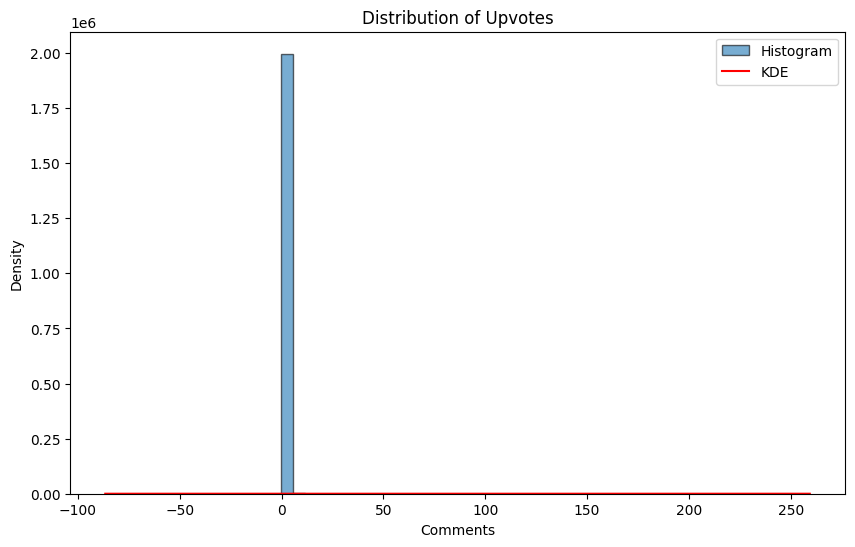

In [31]:

import pandas as pd
import matplotlib.pyplot as plt


# Drop NaN values in the comments column for plotting
comments = depression['num_comments']

# Plotting the histogram and KDE
plt.figure(figsize=(10, 6))
plt.hist(upvotes, bins=30, alpha=0.6, edgecolor='black', label='Histogram')
upvotes.plot(kind='kde', color='red', label='KDE')

# Adding labels and title
plt.xlabel('Comments')
plt.ylabel('Density')
plt.title('Distribution of Upvotes')
plt.legend()

# Show the plot
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming depression['upvotes'] contains the upvote data
# Ensure there are no NaN values in 'upvotes' for standardization, or handle NaNs as needed
depression['upvotes'] = depression['upvotes']

# Standardize the upvotes column
scaler = StandardScaler()
depression['upvotes'] = scaler.fit_transform(depression['upvotes'].values.reshape(-1, 1))




In [17]:
depression

,Unnamed: 0,subreddit,title,body,upvotes,num_comments,label,created_datetime,unique_id,cleaned_body
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",-0.053402,-0.209437,0.0,2014-07-14 03:35:09,0,start consider 99 underdog begin value start root
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,-0.053402,-0.194279,0.0,2014-09-13 00:31:19,1,anyway human morality joke long abscence hope ...
2,47957,DeepThoughts,Rebirth!,Hello. I am the new guy in charge here (Beside...,-0.050527,-0.194279,0.0,2014-11-20 04:31:58,2,hello new guy charge besides thegood ofc bring...
3,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,-0.051964,-0.148806,0.0,2014-11-20 20:36:52,3,could take one cell body kill would still yet ...
4,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",-0.047652,0.139190,0.0,2014-11-22 19:17:39,4,personally think infinite always grow
...,...,...,...,...,...,...,...,...,...,...
2000377,10370336,depression,[M/25] Is it even worth it anymore?,Hello and thanks for reading this. I'm sorry f...,-0.051964,-0.209437,1.0,2020-12-15 21:45:22,2000377,hello thanks read sorry wall text get 25 year ...
2000378,10438776,depression,"Working with depression, the never ending sick...",Having to go to work everyday while depressed ...,-0.049089,-0.088175,1.0,2021-04-06 04:56:33,2000378,go work everyday depress like work feel weathe...
2000379,10449200,depression,"Hi, bye.",I just wanna fuckin die I just wanna feel alri...,-0.046214,-0.103333,1.0,2021-04-24 18:29:30,2000379,wan na fuckin die wan na feel alright see fine...
2000380,10468508,depression,Writing a letter to depression,Hey! I wrote a post like this before and recei...,-0.051964,-0.209437,1.0,2021-05-30 15:54:57,2000380,hey write post like receive wonderful reply ba...


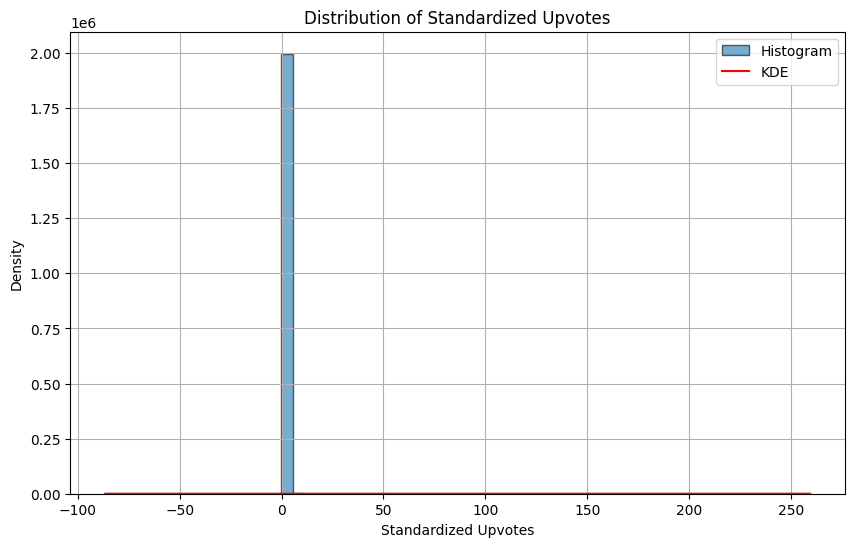

In [34]:
# Plotting the distribution of the standardized upvotes
plt.figure(figsize=(10, 6))
plt.hist(depression['upvotes'], bins=30, alpha=0.6, edgecolor='black', label='Histogram')
depression['upvotes'].plot(kind='kde', color='red', label='KDE')
plt.xlabel('Standardized Upvotes')
plt.ylabel('Density')
plt.title('Distribution of Standardized Upvotes')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming depression['upvotes'] contains the upvote data
# Ensure there are no NaN values in 'upvotes' for standardization, or handle NaNs as needed
depression['num_comments'] = depression['num_comments']

# Standardize the upvotes column
scaler = StandardScaler()
depression['num_comments'] = scaler.fit_transform(depression['num_comments'].values.reshape(-1, 1))




In [24]:
depression['num_comments'].mean()

6.395686458493412e-18

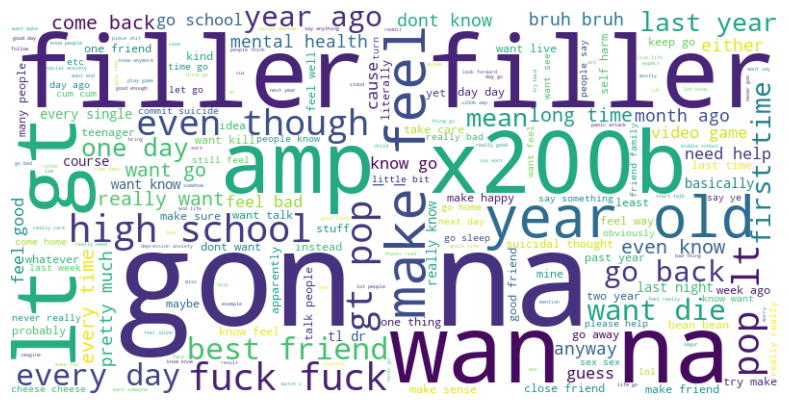

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words in the 'cleaned_body' column into a single string
text_for_wordcloud = ' '.join(depression['cleaned_body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [35]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm

# Load the data
# Replace with the correct path if necessary
data = depression  # Assuming you have saved the data as reddit_posts.csv

# Select the variables for regression
X = data[['num_comments']]
y = data['label']  # Assuming 'label' is the variable you're interested in predicting

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4315.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:35:42   Log-Likelihood:            -1.1064e+06
No. Observations:             2000027   AIC:                         2.213e+06
Df Residuals:                 2000025   BIC:                         2.213e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2305      0.000    774.946   

In [26]:
# Count of NaNs in each column
depression.isna().sum()


subreddit           0
title               2
upvotes             0
num_comments        0
label               0
created_datetime    0
cleaned_body        0
dtype: int64

Train test spli the dataset

In [27]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000027 entries, 0 to 2000026
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   subreddit         object 
 1   title             object 
 2   upvotes           float64
 3   num_comments      float64
 4   label             float64
 5   created_datetime  object 
 6   cleaned_body      object 
dtypes: float64(3), object(4)
memory usage: 106.8+ MB


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `data` contains your dataset and 'cleaned_body' column is the text to analyze
texts = depression['cleaned_body']

# Function to find all n-grams with TF-IDF scores and save to DataFrame
def get_all_ngrams_df(corpus, ngram_range=(1, 1)):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq, columns=['ngram', 'tfidf_score'])

# Find and save all unigrams with TF-IDF scores
all_unigrams_df = get_all_ngrams_df(texts, ngram_range=(1, 1))
all_unigrams_df.to_csv('all_unigrams_tfidf.tsv', sep='\t', index=False)

# Find and save all bigrams with TF-IDF scores
all_bigrams_df = get_all_ngrams_df(texts, ngram_range=(2, 2))
all_bigrams_df.to_csv('all_bigrams_tfidf.tsv', sep='\t', index=False)

print("All unigrams and bigrams with TF-IDF scores saved to 'all_unigrams_tfidf.tsv' and 'all_bigrams_tfidf.tsv'")


All unigrams and bigrams with TF-IDF scores saved to 'all_unigrams_tfidf.tsv' and 'all_bigrams_tfidf.tsv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

class TFISFVectorizer:
    def __init__(self, min_comments_freq):
        self.min_comments_freq = min_comments_freq
        self.count_vectorizer = CountVectorizer()
        self.feature_names = []
        self.isf = None

    def fit(self, texts, sentiments):
        # Step (i): Count appearances of all unique tokens across all reviews
        term_matrix = self.count_vectorizer.fit_transform(texts)
        self.feature_names = self.count_vectorizer.get_feature_names_out()
        
        # Filter terms by minimum review frequency
        term_review_counts = (term_matrix > 0).sum(axis=0).A1
        valid_terms = [i for i, count in enumerate(term_review_counts) if count >= self.min_comments_freq]
        
        # Reduce the term matrix to valid terms only
        self.term_matrix = term_matrix[:, valid_terms]
        self.feature_names = [self.feature_names[i] for i in valid_terms]
        
        # Step (ii): Calculate sentiment-specific term frequencies
        unique_sentiments = np.unique(sentiments)
        n_sentiments = len(unique_sentiments)
        
        # Initialize ISF
        self.isf = np.zeros(len(self.feature_names))
        
        # Calculate ISF with the polynomial transformation
        for j in range(len(self.feature_names)):
            sf = sum(1 for sentiment in unique_sentiments 
                     if (self.term_matrix[sentiments == sentiment][:, j] > 0).sum() > 0)  # Sentiment frequency
            self.isf[j] = (n_sentiments - sf + 1) ** 2  # Second-order polynomial ISF
            
        return self
    
    def transform(self):
        # Step (iv): Calculate TF-ISF for each individual review
        row_indices, col_indices, data = [], [], []
        
        for i in range(self.term_matrix.shape[0]):
            term_counts = self.term_matrix[i].toarray().flatten()  # Convert sparse row to dense format
            total_terms = term_counts.sum() if term_counts.sum() > 0 else 1  # Avoid division by zero
            
            for j, count in enumerate(term_counts):
                if count > 0:  # Only store non-zero TF-ISF values
                    tf = count / total_terms  # Term frequency in review
                    tf_isf_value = tf * self.isf[j]  # TF-ISF calculation for term j in review i
                    
                    row_indices.append(i)
                    col_indices.append(j)
                    data.append(tf_isf_value)
        
        # Convert lists to sparse matrix to save memory
        X_sent_sparse = csr_matrix((data, (row_indices, col_indices)), shape=self.term_matrix.shape)
        return X_sent_sparse

# Load and preprocess data
# Assuming 'depression' DataFrame is already defined

# Calculate the mean and minimum number of comments for minimum frequency
mean_comments = depression['num_comments'].mean()
min_comments = depression['num_comments'].min()
min_comments_freq = int(0.05 * (mean_comments + min_comments))

# Convert text data to list, handling NaN by replacing with empty string
texts = depression['cleaned_body'].fillna("").tolist()
sentiments = depression['label'].values  # Get the sentiment labels

# Remove any entries where sentiment or text is NaN
valid_indices = ~pd.isna(sentiments) & ~pd.isna(texts)
texts = [text for i, text in enumerate(texts) if valid_indices[i]]
sentiments = sentiments[valid_indices]

# Initialize and fit TF-ISF vectorizer with adjusted min_comments_freq
tfisf_vectorizer = TFISFVectorizer(min_comments_freq=min_comments_freq)
tfisf_vectorizer.fit(texts, sentiments)

# Transform to get TF-ISF matrix per review
X_sent = tfisf_vectorizer.transform()
print("X_sent shape:", X_sent.shape)  # Should reflect (number of reviews, feature count)


In [62]:
depression['num_comments'].mean()

6.395686458493412e-18

In [75]:
X_sent.shape

(2000027, 102)

In [76]:
y.shape

(2000027,)

In [77]:
from sklearn.model_selection import train_test_split

# Assuming X_sent is your TF-ISF matrix and `sentiments` is the target
X_train, X_test, y_train, y_test = train_test_split(X_sent, sentiments, test_size=0.2, random_state=42)


In [79]:
from sklearn.linear_model import LogisticRegression

# Initialize a classifier
classifier = LogisticRegression()


In [80]:
# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)


After the cleaning this is what NAs we have

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

# Print a classification report for more details
print("Classification Report:\n", classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.87    307788
         1.0       0.61      0.25      0.35     92218

    accuracy                           0.79    400006
   macro avg       0.71      0.60      0.61    400006
weighted avg       0.76      0.79      0.75    400006

Accuracy: 0.7897
Precision: 0.6058
Recall: 0.2508
F1 Score: 0.3547
ROC AUC Score: 0.8498


In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

class TFISFVectorizer:
    def __init__(self, min_comments_freq):
        self.min_comments_freq = min_comments_freq
        self.count_vectorizer = CountVectorizer()
        self.feature_names = []
        self.isf = None

    def fit(self, texts, sentiments):
        # Step (i): Count appearances of all unique tokens across all reviews
        term_matrix = self.count_vectorizer.fit_transform(texts)
        self.feature_names = self.count_vectorizer.get_feature_names_out()
        
        # Filter terms by minimum review frequency
        term_review_counts = (term_matrix > 0).sum(axis=0).A1
        valid_terms = [i for i, count in enumerate(term_review_counts) if count >= self.min_comments_freq]
        
        # Reduce the term matrix to valid terms only
        self.term_matrix = term_matrix[:, valid_terms]
        self.feature_names = [self.feature_names[i] for i in valid_terms]
        
        # Step (ii): Calculate sentiment-specific term frequencies
        unique_sentiments = np.unique(sentiments)
        n_sentiments = len(unique_sentiments)
        
        # Initialize ISF
        self.isf = np.zeros(len(self.feature_names))
        
        # Calculate ISF with the polynomial transformation
        for j in range(len(self.feature_names)):
            # Mask to check occurrence per sentiment, improving efficiency
            sf = sum(1 for sentiment in unique_sentiments 
                     if (self.term_matrix[sentiments == sentiment][:, j] > 0).sum() > 0)
            self.isf[j] = (n_sentiments - sf + 1) ** 2  # Second-order polynomial ISF
            
        return self
    
    def transform(self):
        # Step (iv): Calculate TF-ISF for each individual review
        row_indices, col_indices, data = [], [], []
        
        for i in range(self.term_matrix.shape[0]):
            term_counts = self.term_matrix[i].toarray().flatten()  # Convert sparse row to dense format
            total_terms = term_counts.sum() if term_counts.sum() > 0 else 1  # Avoid division by zero
            
            for j, count in enumerate(term_counts):
                if count > 0:  # Only store non-zero TF-ISF values
                    tf = count / total_terms  # Term frequency in review
                    tf_isf_value = tf * self.isf[j]  # TF-ISF calculation for term j in review i
                    
                    row_indices.append(i)
                    col_indices.append(j)
                    data.append(tf_isf_value)
        
        # Convert lists to sparse matrix to save memory
        X_sent_sparse = csr_matrix((data, (row_indices, col_indices)), shape=self.term_matrix.shape)
        return X_sent_sparse

# Load and preprocess data
# Assuming 'depression' DataFrame is already defined

# Calculate the mean and minimum number of comments for minimum frequency
mean_comments = depression['num_comments'].mean()
min_comments = depression['num_comments'].min()
min_comments_freq = int(0.05 * (mean_comments + min_comments))

# Convert text data to list, handling NaN by replacing with empty string
texts = depression['cleaned_body'].fillna("").tolist()
sentiments = depression['label'].values  # Get the sentiment labels

# Remove any entries where sentiment or text is NaN
valid_indices = ~pd.isna(sentiments) & ~pd.isna(texts)
texts = [text for i, text in enumerate(texts) if valid_indices[i]]
sentiments = sentiments[valid_indices]

# Initialize and fit TF-ISF vectorizer with adjusted min_comments_freq
tfisf_vectorizer = TFISFVectorizer(min_comments_freq=min_comments_freq)
tfisf_vectorizer.fit(texts, sentiments)

# Transform to get TF-ISF matrix per review
X_sent = tfisf_vectorizer.transform()
print("X_sent shape:", X_sent.shape)  # Should reflect (number of reviews, feature count)


KeyboardInterrupt: 

In [36]:
y = depression['label']
X = depression.drop(columns=['label'])  # Feature matrix without 'label' column

In [37]:
X

,Unnamed: 0,subreddit,title,body,upvotes,num_comments
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,0.0
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.0
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.0
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,4.0
5,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",8.0,23.0
...,...,...,...,...,...,...
2470773,10742224,depression,Alone as usual,I just argued with my mom an hour ago; she alw...,9.0,6.0
2470774,10742230,depression,Help needed urgently!,OK basically non of my friend's or family invi...,5.0,7.0
2470775,10742232,depression,I know what your thinking,Don't do It. Not today. Its gonna be ok if you...,10.0,8.0
2470776,10742243,depression,how do I stop having such a cynical view on ma...,"So I don't know, I've recently realized that t...",8.0,9.0


#Convert to lowercase, remove stopwords, remove punctuations

In [53]:
X = X.iloc[:999].copy()  # Make a copy to avoid SettingWithCopyWarning
#In case you have not noticed the nltk removed the very common english words from the text!!


Create the n-grams

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# Create n-grams from the cleaned_body column
def create_ngrams(text_series, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word', token_pattern=r'\b\w+\b', min_df=1)
    X_ngrams = vectorizer.fit_transform(text_series)
    return X_ngrams, vectorizer.get_feature_names_out()

# Apply n-grams to the 'cleaned_body' column
X_ngrams, ngram_features = create_ngrams(X['cleaned_body'], n=3)


NameError: name 'X' is not defined

In [79]:
X.head()

,Unnamed: 0,subreddit,title,body,upvotes,num_comments,cleaned_body,shingles,minhash
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,0.0,start considering 99 underdog begin value star...,"{start considering 99, considering 99 underdog...",<datasketch.minhash.MinHash object at 0x000002...
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.0,anyway human morality joke long abscence hope ...,"{long abscence hope, joke long abscence, deep ...",<datasketch.minhash.MinHash object at 0x000002...
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.0,hello new guy charge besides thegood ofc bring...,"{new guy charge, charge besides thegood, intru...",<datasketch.minhash.MinHash object at 0x000002...
3,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,4.0,could take one cell body kill would still yet ...,"{forth direct evidence, conscious observer one...",<datasketch.minhash.MinHash object at 0x000002...
4,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",8.0,23.0,personally think infinite always grow,"{personally think infinite, infinite always gr...",<datasketch.minhash.MinHash object at 0x000002...


Apply LSH

In [75]:
from datasketch import MinHash, MinHashLSH
import pandas as pd

# Initialize LSH with the desired number of hash functions
lsh = MinHashLSH(threshold=0.5, num_perm=128)

# Generate MinHashes for each text
minhashes = {}
for i, text in enumerate(X['cleaned_body'].values):
    minhash = MinHash(num_perm=128)
    for word in text.split():
        minhash.update(word.encode('utf8'))
    minhashes[i] = minhash
    lsh.insert(i, minhash)

# List to hold similarity results
similarity_results = []

# Query for similar items for each document
for i in minhashes.keys():
    similar_items = lsh.query(minhashes[i])
    for j in similar_items:
        if i < j:  # Only keep pairs where Doc1 < Doc2 to avoid duplicates
            # Calculate similarity score as Jaccard similarity
            similarity_score = minhashes[i].jaccard(minhashes[j])
            similarity_results.append([i, j, similarity_score])

# Create DataFrame and save to TSV file
similarity_df = pd.DataFrame(similarity_results, columns=["Doc1", "Doc2", "Similarity"])
similarity_df.to_csv("document_similarities.tsv", sep='\t', index=False)


In [78]:
from datasketch import MinHash, MinHashLSH
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Create a list to hold the similarity results
similarity_results = []

# Compute Jaccard Similarity using MinHash
for i in minhashes.keys():
    similar_items = lsh.query(minhashes[i])
    for j in similar_items:
        if i < j:  # Ensure unique pairs
            jaccard_similarity = minhashes[i].jaccard(minhashes[j])
            similarity_results.append([i, j, jaccard_similarity, None])  # Placeholder for cosine similarity

# Convert similarity results to a DataFrame
similarity_df = pd.DataFrame(similarity_results, columns=["Doc1", "Doc2", "Jaccard Similarity", "Cosine Similarity"])

# Calculate Cosine Similarity using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['cleaned_body'].values)

# Update the DataFrame with Cosine Similarity values
for index, row in similarity_df.iterrows():
    i, j = row["Doc1"], row["Doc2"]
    cosine_sim = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0]
    similarity_df.at[index, "Cosine Similarity"] = cosine_sim

# Save the results to a TSV file
similarity_df.to_csv("document_similarities.tsv", sep='\t', index=False)

print("Document similarities (Jaccard and Cosine) have been saved to 'document_similarities.tsv'.")

Document similarities (Jaccard and Cosine) have been saved to 'document_similarities.tsv'.


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

# Tokenize each document into words
tokenized_texts = X['cleaned_body'].apply(lambda x: x.split()).tolist()

# Encode data for A-priori
te = TransactionEncoder()
te_ary = te.fit(tokenized_texts).transform(tokenized_texts)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply A-priori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

# Optional: Find association rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)


In [77]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Tokenize each document into words
tokenized_texts = X['cleaned_body'].apply(lambda x: x.split()).tolist()

# Encode data for A-priori
te = TransactionEncoder()
te_ary = te.fit(tokenized_texts).transform(tokenized_texts)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply A-priori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)

# Save frequent itemsets to TSV file
frequent_itemsets.to_csv("apriori_frequent_itemsets.tsv", sep='\t', index=False)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Save association rules to TSV file
rules.to_csv("apriori_association_rules.tsv", sep='\t', index=False)

print("Frequent itemsets and association rules have been saved as TSV files.")


Frequent itemsets and association rules have been saved as TSV files.


transformer

In [36]:
! pip install ipywidgets rich seaborn torch datasets transformers tokenizers sentencepiece sacremoses --quiet

%matplotlib inline

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import torch
from torch import nn
import math
from functools import partial
from pathlib import Path
from tqdm import tqdm
import rich
from typing import List, Tuple, Optional, Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import transformers
import tokenizers
import datasets
import zipfile
from huggingface_hub import hf_hub_download

sns.set_theme()

# define the device to use
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
rich.print(f"Device: [red]{DEVICE}")

# control verbosity
transformers.logging.set_verbosity_error()
datasets.logging.set_verbosity_error()

# define support functions
def load_glove_vectors(filename = "glove.6B.300d.txt") -> Tuple[List[str], torch.Tensor]:
    """Load the GloVe vectors. See: `https://github.com/stanfordnlp/GloVe`"""
    path = Path(hf_hub_download(repo_id="stanfordnlp/glove", filename="glove.6B.zip"))
    target_file = path.parent / filename
    if not target_file.exists():
        with zipfile.ZipFile(path, 'r') as zip_ref:
            zip_ref.extractall(path.parent)

        if not target_file.exists():
            print(f"Available files:")
            for p in path.parent.iterdir():
                print(p)
            raise ValueError(f"Target file `{target_file.name}` can't be found. Check if `{filename}` was properly downloaded.")

    # parse the vocabulary and the vectors
    vocabulary = []
    vectors = []
    with open(target_file, "r", encoding="utf8") as f:
        for l in tqdm(f.readlines(), desc=f"Parsing {target_file.name}..." ):
            word, *vector = l.split()
            vocabulary.append(word)
            vectors.append(torch.tensor([float(v) for v in vector]))
    vectors = torch.stack(vectors)
    return vocabulary, vectors


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Device: cpu

In [37]:
# prepare data for the later cells
glove_vocabulary, glove_vectors = load_glove_vectors()
rich.print(f"glove_vocabulary: type={type(glove_vocabulary)}, length={len(glove_vocabulary)}")
rich.print(f"glove_vectors: type={type(glove_vectors)}, shape={glove_vectors.shape}, dtype={glove_vectors.dtype}")

# add special tokens
special_tokens = ['<|start|>', '<|unknown|>', '<|pad|>']
glove_vocabulary = special_tokens + glove_vocabulary
glove_vectors = torch.cat([torch.randn_like(glove_vectors[:len(special_tokens)]), glove_vectors])

# tokenizer for GloVe
glove_tokenizer = tokenizers.Tokenizer(tokenizers.models.WordLevel(vocab={v:i for i,v in enumerate(glove_vocabulary)}, unk_token="<|unknown|>"))
glove_tokenizer.normalizer = tokenizers.normalizers.BertNormalizer(strip_accents=False)
glove_tokenizer.pre_tokenizer = tokenizers.pre_tokenizers.Whitespace()

Parsing glove.6B.300d.txt...: 100%|██████████| 400001/400001 [01:33<00:00, 4292.92it/s]


glove_vocabulary: type=<class 'list'>, length=400001

glove_vectors: type=<class 'torch.Tensor'>, shape=torch.Size([400001, 300]), dtype=torch.float32

In [38]:
# Define the BPE tokenizer
tokenizer_name = "BPE (GPT-2)"
bpe_tokenizer = transformers.AutoTokenizer.from_pretrained("distilgpt2")

# Function to process and display tokenization for a sentence using the BPE tokenizer
def process_sentence_with_bpe_tokenizer(sentence: str):
    """Tokenizes the input sentence using the BPE tokenizer and reports the tokens and ids."""
    # Tokenize the sentence
    token_ids = bpe_tokenizer.encode(sentence, add_special_tokens=False)
    tokens = [bpe_tokenizer.decode([t]) for t in token_ids]

    # Report
    rich.print(f"[red]{tokenizer_name}[/red]: sentence converted into {len(token_ids)} tokens (vocabulary size: {bpe_tokenizer.vocab_size} tokens)")
    rich.print(f"Tokens:\n{tokens}")
    rich.print(f"Token ids:\n{token_ids}")

# Process sentences from the 'cleaned_body' column in your dataset
# Assuming `dataset` is a DataFrame containing the Reddit Depression Dataset
for sentence in depression['cleaned_body'].sample(5):  # Sampling 5 rows for quick testing
    rich.print(f"\n[bold blue]Processing sentence:[/bold blue] {sentence}")
    process_sentence_with_bpe_tokenizer(sentence)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\Users\antot\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\antot\.cache\huggingface\hub\models--distilgpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Processing sentence: mod share story

BPE (GPT-2): sentence converted into 3 tokens (vocabulary size: 50257 tokens)

Tokens:
['mod', ' share', ' story']

Token ids:
[4666, 2648, 1621]

Processing sentence: start take short shower

BPE (GPT-2): sentence converted into 4 tokens (vocabulary size: 50257 tokens)

Tokens:
['start', ' take', ' short', ' shower']

Token ids:
[9688, 1011, 1790, 14643]

Processing sentence: aka police

BPE (GPT-2): sentence converted into 2 tokens (vocabulary size: 50257 tokens)

Tokens:
['aka', ' police']

Token ids:
[8130, 1644]

Processing sentence: like fuck pendulum go back forth state mind want run away everything run away constant fuck 
stomachache follow around end world shit

BPE (GPT-2): sentence converted into 24 tokens (vocabulary size: 50257 tokens)

Tokens:
['like', ' fuck', ' pend', 'ulum', ' go', ' back', ' forth', ' state', ' mind', ' want', ' run', ' away', ' 
everything', ' run', ' away', ' constant', ' fuck', ' stomach', 'ache', ' follow', ' around', ' end', ' world', ' 
shit']

Token ids:
[2339, 5089, 44017, 14452, 467, 736, 6071, 1181, 2000, 765, 1057, 1497, 2279, 1057, 1497, 6937, 5089, 11384, 4891, 
1061, 1088, 886, 995, 7510]

Processing sentence: girlfriend break turn one side relationship 6 month say date felt bad basically date pity wan 
na die

BPE (GPT-2): sentence converted into 19 tokens (vocabulary size: 50257 tokens)

Tokens:
['girlfriend', ' break', ' turn', ' one', ' side', ' relationship', ' 6', ' month', ' say', ' date', ' felt', ' 
bad', ' basically', ' date', ' pity', ' w', 'an', ' na', ' die']

Token ids:
[45189, 2270, 1210, 530, 1735, 2776, 718, 1227, 910, 3128, 2936, 2089, 6209, 3128, 26246, 266, 272, 12385, 4656]

In [39]:
# Define embedding dimension
hdim = 5  # Adjust this as needed for your embedding dimension

# Initialize the BPE tokenizer (distilgpt2)
tokenizer = transformers.AutoTokenizer.from_pretrained("distilgpt2")

# Create a random embedding matrix for the BPE tokenizer's vocabulary size
embeddings = torch.randn((tokenizer.vocab_size, hdim))  # Embedding matrix
rich.print(f"Embeddings (shape): {embeddings.shape}")

# Function to process and display token embeddings for each sentence
def process_sentence_embeddings(sentence: str):
    """Tokenizes the sentence using BPE, retrieves token IDs, and calculates embeddings."""
    # Tokenize the sentence and get token IDs
    token_ids = tokenizer.encode(sentence, add_special_tokens=False, return_tensors="pt")[0]
    rich.print(f"Token ids (shape): {token_ids.shape}")

    # Convert token IDs to one-hot vectors and calculate embeddings
    vectors = torch.nn.functional.one_hot(token_ids, tokenizer.vocab_size).float() @ embeddings
    rich.print(f"Vectors (shape): {vectors.shape}")
    rich.print(f"List of tokens and their corresponding vectors:")

    # Display tokens with their vector representations
    for t, v in zip(token_ids, vectors):
        token_info = f"[blue]{tokenizer.decode([t]):5}[/blue] (token id: {t:4})"
        rich.print(f" * {token_info} -> {v}")

# Process sentences from the 'cleaned_body' column in your dataset
# Assuming `dataset` is a DataFrame containing the Reddit Depression Dataset
for sentence in depression['cleaned_body'].sample(5):  # Sampling 5 rows for quick testing
    rich.print(f"\n[bold blue]Processing sentence:[/bold blue] {sentence}")
    process_sentence_embeddings(sentence)


Embeddings (shape): torch.Size([50257, 5])

Processing sentence: make day find someone follow happy message thank follow like im happy edit another person 
follow im happy boi edit2 another person follow edit3 6 follower

Token ids (shape): torch.Size([29])

Vectors (shape): torch.Size([29, 5])

List of tokens and their corresponding vectors:

* make  (token id: 15883) -> tensor([ 0.6425,  0.4400,  0.4756,  1.3328, -0.3714])

*  day  (token id: 1110) -> tensor([-1.0124,  1.2302,  0.1081, -0.5166,  0.7727])

*  find (token id: 1064) -> tensor([ 0.3603,  0.7449,  0.8740, -1.1042,  1.1421])

*  someone (token id: 2130) -> tensor([-1.5099, -0.7516, -0.7105, -1.0876,  0.5168])

*  follow (token id: 1061) -> tensor([ 1.8159,  0.7277,  0.2354, -0.1637,  0.0150])

*  happy (token id: 3772) -> tensor([0.3570, 2.0384, 0.1100, 0.3816, 0.0295])

*  message (token id: 3275) -> tensor([ 0.5795,  1.9900, -1.2280, -1.3869,  0.1116])

*  thank (token id: 5875) -> tensor([ 0.4819, -0.5810,  0.2031,  0.2901, -1.1995])

*  follow (token id: 1061) -> tensor([ 1.8159,  0.7277,  0.2354, -0.1637,  0.0150])

*  like (token id:  588) -> tensor([-0.6000,  0.6902, -0.2654, -1.9780,  2.1832])

*  im   (token id:  545) -> tensor([ 0.4480, -0.1095,  0.1854,  0.2554,  1.0079])

*  happy (token id: 3772) -> tensor([0.3570, 2.0384, 0.1100, 0.3816, 0.0295])

*  edit (token id: 4370) -> tensor([ 0.8239, -0.1186, -0.1183,  0.4040, -0.3596])

*  another (token id: 1194) -> tensor([ 1.6911,  0.8962, -0.2383,  0.6369, -0.6929])

*  person (token id: 1048) -> tensor([-0.2465,  0.8099,  0.4239, -0.4599,  0.3455])

*  follow (token id: 1061) -> tensor([ 1.8159,  0.7277,  0.2354, -0.1637,  0.0150])

*  im   (token id:  545) -> tensor([ 0.4480, -0.1095,  0.1854,  0.2554,  1.0079])

*  happy (token id: 3772) -> tensor([0.3570, 2.0384, 0.1100, 0.3816, 0.0295])

*  bo   (token id: 1489) -> tensor([-0.5179,  0.5196,  1.6280,  0.4588, -0.1489])

* i     (token id:   72) -> tensor([-0.2785, -0.0241, -1.2967,  0.0345, -0.5780])

*  edit (token id: 4370) -> tensor([ 0.8239, -0.1186, -0.1183,  0.4040, -0.3596])

* 2     (token id:   17) -> tensor([-0.4019,  1.7469, -1.2870,  2.1947,  0.1425])

*  another (token id: 1194) -> tensor([ 1.6911,  0.8962, -0.2383,  0.6369, -0.6929])

*  person (token id: 1048) -> tensor([-0.2465,  0.8099,  0.4239, -0.4599,  0.3455])

*  follow (token id: 1061) -> tensor([ 1.8159,  0.7277,  0.2354, -0.1637,  0.0150])

*  edit (token id: 4370) -> tensor([ 0.8239, -0.1186, -0.1183,  0.4040, -0.3596])

* 3     (token id:   18) -> tensor([-0.8283, -0.1748,  1.5897,  0.1305, -0.2411])

*  6    (token id:  718) -> tensor([ 2.0605, -1.2203,  2.0197, -0.8812,  1.5687])

*  follower (token id: 33040) -> tensor([-1.2698, -0.6961,  0.8329,  1.2058,  0.2977])

Processing sentence: someone already need bad curse word would instantly kill someone

Token ids (shape): torch.Size([10])

Vectors (shape): torch.Size([10, 5])

List of tokens and their corresponding vectors:

* someone (token id: 46248) -> tensor([0.4644, 0.1530, 0.2335, 0.4992, 0.7678])

*  already (token id: 1541) -> tensor([-0.4980,  0.0539, -0.8196,  1.3377,  0.1364])

*  need (token id:  761) -> tensor([ 1.2229,  0.6357, -0.0071,  0.9795, -0.7318])

*  bad  (token id: 2089) -> tensor([-1.2387, -2.1687, -1.0500,  0.7140,  0.7054])

*  curse (token id: 17328) -> tensor([-1.6020, -0.9674,  1.4650, -0.2613, -0.1969])

*  word (token id: 1573) -> tensor([ 0.9735,  0.9899,  0.8441, -0.5916, -0.0254])

*  would (token id:  561) -> tensor([-0.0272,  0.5304, -1.1951, -0.6916, -0.4468])

*  instantly (token id: 11101) -> tensor([ 0.4926, -0.7518,  0.2930,  1.4172,  1.3528])

*  kill (token id: 1494) -> tensor([-1.3618,  0.4102, -1.3950,  0.1121,  0.0798])

*  someone (token id: 2130) -> tensor([-1.5099, -0.7516, -0.7105, -1.0876,  0.5168])

Processing sentence: parent totally believe apply keep say get definitely get scholarship also get scholarship big 
happy

Token ids (shape): torch.Size([15])

Vectors (shape): torch.Size([15, 5])

List of tokens and their corresponding vectors:

* parent (token id: 8000) -> tensor([ 0.4437, -0.2164,  1.9756,  0.6244,  0.8770])

*  totally (token id: 6635) -> tensor([-1.7066, -1.2964, -0.0930, -0.2820,  0.0316])

*  believe (token id: 1975) -> tensor([-0.2671,  1.6104, -0.6647,  0.3148, -0.1491])

*  apply (token id: 4174) -> tensor([-0.5010,  0.7269, -0.4576, -0.0192,  0.7634])

*  keep (token id: 1394) -> tensor([-2.6044,  1.6457,  0.4609,  0.0838,  1.2764])

*  say  (token id:  910) -> tensor([-0.9584,  1.6737, -0.8543, -0.5516, -0.2798])

*  get  (token id:  651) -> tensor([-1.7209, -0.0882, -1.1247, -0.0655,  0.3430])

*  definitely (token id: 4753) -> tensor([ 1.3942,  0.4439, -0.7700, -0.9197, -0.0219])

*  get  (token id:  651) -> tensor([-1.7209, -0.0882, -1.1247, -0.0655,  0.3430])

*  scholarship (token id: 18652) -> tensor([ 0.2513,  0.6398,  0.7690, -0.7785, -0.3569])

*  also (token id:  635) -> tensor([-1.0728,  0.3139, -0.3076, -0.0179,  0.8150])

*  get  (token id:  651) -> tensor([-1.7209, -0.0882, -1.1247, -0.0655,  0.3430])

*  scholarship (token id: 18652) -> tensor([ 0.2513,  0.6398,  0.7690, -0.7785, -0.3569])

*  big  (token id: 1263) -> tensor([0.0751, 0.2228, 1.9666, 0.0336, 0.2479])

*  happy (token id: 3772) -> tensor([0.3570, 2.0384, 0.1100, 0.3816, 0.0295])

Processing sentence: scared life please help

Token ids (shape): torch.Size([5])

Vectors (shape): torch.Size([5, 5])

List of tokens and their corresponding vectors:

* sc    (token id: 1416) -> tensor([-0.4354, -1.9338, -0.0043,  1.2377, -0.2218])

* ared  (token id: 1144) -> tensor([-0.5463, -0.7094, -1.6645,  0.2545, -1.1815])

*  life (token id: 1204) -> tensor([-0.7618, -1.2310, -1.0237,  1.0329,  0.5292])

*  please (token id: 3387) -> tensor([-0.3023, -1.1800,  1.3043, -0.2517, -1.0985])

*  help (token id: 1037) -> tensor([-1.1204, -0.6875, -0.0847, -1.1444,  0.7640])

Processing sentence: 😳😳🖐

Token ids (shape): torch.Size([7])

Vectors (shape): torch.Size([7, 5])

List of tokens and their corresponding vectors:

* �     (token id: 47249) -> tensor([ 0.8430, -0.7100, -0.2550,  0.5562, -0.2447])

* �     (token id:  111) -> tensor([ 0.1397, -0.1438,  0.7964, -0.7438,  0.5934])

* �     (token id: 47249) -> tensor([ 0.8430, -0.7100, -0.2550,  0.5562, -0.2447])

* �     (token id:  111) -> tensor([ 0.1397, -0.1438,  0.7964, -0.7438,  0.5934])

* �     (token id: 8582) -> tensor([-0.5835,  1.8859,  0.4851,  1.7360, -0.7088])

* �     (token id:  244) -> tensor([-0.6306, -0.8193,  0.5237,  0.8167, -0.3177])

* �     (token id:  238) -> tensor([-1.8196,  0.0087,  0.8626,  0.0505,  2.2824])

In [41]:
# Function to convert a word to its GloVe vector
def word2vec(word: str, vocabulary: List[str], vectors: torch.Tensor) -> Optional[torch.Tensor]:
    """Convert a word into a vector."""
    word = word.lower()
    if word in vocabulary:
        word_idx = vocabulary.index(word)
        return vectors[word_idx]
    else:
        return None

# Function to retrieve nearest word neighbors for an input vector
def vec2words(
        vec: torch.Tensor,
        k=5,
        *,
        vocabulary: List[str],
        vectors: torch.Tensor,
        exclude_vecs: List[torch.Tensor] = None,
    ) -> Tuple[List[str], torch.Tensor]:
    """Retrieve the nearest word neighbors for an input vector."""
    
    # Compute the similarity between `vec` and all vectors in `vectors`
    similarity = vectors @ vec

    # Optionally filter out specified vocabulary entries
    if exclude_vecs is not None and len(exclude_vecs):
        mask = None
        for e in exclude_vecs:
            mask_ = (vectors == e[None, :]).all(dim=1)
            if mask is None:
                mask = mask_
            else:
                mask |= mask_
        similarity.masked_fill_(mask=mask, value=-math.inf)

    # Return the indices of the nearest neighbors based on similarity
    nearest_neighbour_ids = torch.argsort(-similarity)[:k]

    # Retrieve corresponding words in `vocabulary`
    return [vocabulary[idx] for idx in nearest_neighbour_ids], similarity[nearest_neighbour_ids]

# Set up the vocabulary and vectors from GloVe embeddings
glove_args = {'vocabulary': glove_vocabulary, 'vectors': glove_vectors}

# Sample usage on 'cleaned_body' text data
rich.print("[red]Nearest neighbor search on cleaned_body text data:")
for sentence in depression['cleaned_body'].sample(5):  # Sampling 5 rows for quick testing
    words_in_sentence = sentence.lower().split()
    for word in words_in_sentence:
        word_vec = word2vec(word, **glove_args)
        if word_vec is not None:
            rich.print(f'\nNearest neighbors of the word "{word}":')
            nearest_words, similarities = vec2words(word_vec, k=5, **glove_args, exclude_vecs=[word_vec])
            rich.print(f"Words: {nearest_words}")
            rich.print(f"Similarities: {similarities}")

# Word analogies on a few relevant examples
rich.print("\n[red]Vector arithmetic on cleaned_body text data:")
cases = [
    [("+", "depression"), ("-", "sad"), ("+", "happy")],
    [("+", "therapy"), ("-", "medicine"), ("+", "support")],
]
for operations in cases:
    # Initialize location in vector space
    location = 0
    rich.print(f"\nVector Translation: [blue]0 {' '.join(f'{d} {v}' for d,v in operations)} = ")
    for sign, word in operations:
        vec = word2vec(word, **glove_args)
        if vec is None:
            rich.print(f"Unknown word `{word}`")
            continue

        # Apply the vector transform to the current location
        direction = {"+": 1, "-": -1}[sign]
        location += direction * vec

    # Retrieve nearest neighbors of the end location
    exclude_list = [word2vec(w, **glove_args) for _, w in operations if word2vec(w, **glove_args) is not None]
    nearest_words, similarities = vec2words(location, k=5, exclude_vecs=exclude_list, **glove_args)
    rich.print(f"Words: {nearest_words}")
    rich.print(f"Similarities: {similarities}")


Nearest neighbor search on cleaned_body text data:

Nearest neighbors of the word "get":

Words: ['you', 'getting', "n't", 'i', 'we']

Similarities: tensor([28.8407, 26.8864, 26.7214, 26.7069, 26.6945])

Nearest neighbors of the word "ta":

Words: ['mok', 'askatasuna', 'pao', 'euskadi', 'khmer']

Similarities: tensor([29.7570, 26.8476, 25.6768, 23.7150, 23.0308])

Nearest neighbors of the word "wait":

Words: ['waiting', "'ll", 'you', 'waited', 'we']

Similarities: tensor([22.4757, 21.4098, 20.4377, 20.2023, 20.0305])

Nearest neighbors of the word "500":

Words: ['400', '200', '300', '600', '1,000']

Similarities: tensor([32.4549, 31.3966, 31.1427, 30.0820, 29.6617])

Nearest neighbors of the word "year":

Words: ['million', 'percent', 'last', 'month', 'months']

Similarities: tensor([25.5862, 25.3210, 25.3076, 25.1334, 24.9651])

Nearest neighbors of the word "walk":

Words: ['walking', 'walks', 'walked', 'inning', 'stroll']

Similarities: tensor([27.9859, 26.8740, 26.2496, 20.9365, 20.1675])

Nearest neighbors of the word "sushi":

Words: ['sashimi', 'steak', 'restaurants', 'salads', 'tuna']

Similarities: tensor([33.8971, 26.2132, 25.1720, 25.0486, 24.7407])

Nearest neighbors of the word "place":

Words: ['cup', 'places', 'round', 'third', 'we']

Similarities: tensor([20.3829, 19.2354, 18.4914, 18.0696, 17.9759])

Nearest neighbors of the word "11":

Words: ['12', '14', '13', '9', '7']

Similarities: tensor([26.6851, 26.3742, 26.3309, 25.9350, 25.7898])

Nearest neighbors of the word "battery":

Words: ['batteries', 'rechargeable', 'lithium', 'lithium-ion', 'anti-aircraft']

Similarities: tensor([40.3328, 30.7612, 27.3018, 25.3240, 24.6604])

Nearest neighbors of the word "leave":

Words: ['stay', 'return', 'left', 'leaving', 'would']

Similarities: tensor([21.6525, 18.9892, 18.6079, 18.6049, 18.4790])

Nearest neighbors of the word "shes":

Words: ['deterioriation', 'zahr', 'mochan', 'rje', 'hennekens']

Similarities: tensor([20.2708, 19.7345, 19.6476, 19.1546, 18.7957])

Nearest neighbors of the word "like":

Words: ['you', 'i', 'do', "n't", '``']

Similarities: tensor([24.2430, 24.0474, 22.7696, 22.3839, 21.7910])

Nearest neighbors of the word "8":

Words: ['6', '7', '9', '4', '5']

Similarities: tensor([32.8344, 32.0454, 31.9993, 31.9467, 31.5704])

Nearest neighbors of the word "month":

Words: ['week', 'year', 'months', 'last', 'weeks']

Similarities: tensor([25.7008, 25.1334, 25.0358, 24.7821, 23.0051])

Nearest neighbors of the word "old":

Words: ['-', '19-year', '35-year', '21-year', '18-year']

Similarities: tensor([26.9014, 25.1263, 24.5099, 24.2652, 24.1361])

Nearest neighbors of the word "someone":

Words: ['somebody', 'you', 'anyone', 'me', "'m"]

Similarities: tensor([28.0524, 26.0357, 25.0014, 24.5186, 23.8687])

Nearest neighbors of the word "close":

Words: ['closed', 'points', 'percent', 'closest', 'down']

Similarities: tensor([21.5308, 21.3162, 20.0295, 19.3274, 18.7735])

Nearest neighbors of the word "sleep":

Words: ['sleeping', 'apnea', 'asleep', 'bed', 'awake']

Similarities: tensor([29.0316, 24.8821, 24.0889, 23.6731, 23.6070])

Nearest neighbors of the word "cut":

Words: ['cuts', 'cutting', 'slash', 'slashed', 'reduce']

Similarities: tensor([30.5098, 27.6843, 25.5047, 24.4575, 23.0435])

Nearest neighbors of the word "thing":

Words: ['i', 'you', 'really', 'think', "'m"]

Similarities: tensor([26.8952, 26.6437, 26.3594, 25.3272, 25.2557])

Nearest neighbors of the word "ever":

Words: ["'ve", 'i', 'never', 'we', 'world']

Similarities: tensor([23.0844, 22.0871, 21.9352, 20.5161, 20.2154])

Nearest neighbors of the word "wrap":

Words: ['refrigerate', 'wrapped', 'wrapping', 'dough', 'foil']

Similarities: tensor([29.8501, 25.4945, 22.7295, 22.1560, 21.1893])

Nearest neighbors of the word "little":

Words: ['bit', 'much', 'lot', 'too', 'you']

Similarities: tensor([26.0341, 22.6653, 22.5366, 21.5928, 20.9378])

Nearest neighbors of the word "blanket":

Words: ['blankets', 'scarf', 'thick', 'cloth', 'pillow']

Similarities: tensor([23.9354, 18.6520, 18.1579, 17.9007, 17.4960])

Nearest neighbors of the word "little":

Words: ['bit', 'much', 'lot', 'too', 'you']

Similarities: tensor([26.0341, 22.6653, 22.5366, 21.5928, 20.9378])

Nearest neighbors of the word "snore":

Words: ['snoring', 'cuss', 'phosphodiesterase', 'hissing', 'apnea']

Similarities: tensor([18.7340, 17.8878, 17.4931, 17.0558, 16.6891])

Nearest neighbors of the word "shes":

Words: ['deterioriation', 'zahr', 'mochan', 'rje', 'hennekens']

Similarities: tensor([20.2708, 19.7345, 19.6476, 19.1546, 18.7957])

Nearest neighbors of the word "adorable":

Words: ['cute', 'lovable', 'cuddly', 'endearing', 'cutest']

Similarities: tensor([24.9070, 21.3162, 21.0713, 19.1804, 17.8137])

Nearest neighbors of the word "make":

Words: ['do', "n't", 'you', 'making', 'made']

Similarities: tensor([24.2103, 23.8386, 23.7621, 23.0003, 22.9282])

Nearest neighbors of the word "sure":

Words: ['you', 'we', 'i', "'m", "n't"]

Similarities: tensor([24.4977, 24.1839, 24.1812, 23.6945, 23.5844])

Nearest neighbors of the word "grow":

Words: ['grows', 'grown', 'growth', 'growing', 'grew']

Similarities: tensor([29.1363, 28.2085, 28.1541, 27.1014, 22.7858])

Nearest neighbors of the word "best":

Words: ['award', 'awards', 'winning', 'film', 'good']

Similarities: tensor([26.0769, 25.2257, 22.4101, 21.9441, 20.6794])

Nearest neighbors of the word "brother":

Words: ['son', 'father', 'uncle', 'nephew', 'cousin']

Similarities: tensor([33.0560, 29.8697, 27.1363, 26.6583, 26.5081])

Nearest neighbors of the word "world":

Words: ['championships', 'champion', 'cup', 'international', 'championship']

Similarities: tensor([27.4238, 26.9127, 26.3364, 25.8050, 25.5366])

Nearest neighbors of the word "also":

Words: ['has', 'have', 'that', 'he', 'been']

Similarities: tensor([19.7322, 18.7461, 18.4336, 17.8880, 17.7343])

Nearest neighbors of the word "get":

Words: ['you', 'getting', "n't", 'i', 'we']

Similarities: tensor([28.8407, 26.8864, 26.7214, 26.7069, 26.6945])

Nearest neighbors of the word "bait":

Words: ['baits', 'fish', 'traps', 'lures', 'tuna']

Similarities: tensor([20.7990, 20.7098, 19.2207, 19.0973, 18.8698])

Nearest neighbors of the word "lonely":

Words: ['desolate', 'bored', 'sad', 'restless', 'lonesome']

Similarities: tensor([18.7866, 18.6480, 18.5961, 18.2197, 17.6861])

Nearest neighbors of the word "simp":

Words: ['drbombay', ',148', 'stmurray', 'charadriiformes', 'fvd']

Similarities: tensor([20.8334, 20.5321, 20.2525, 20.1496, 20.0177])

Nearest neighbors of the word "journal":

Words: ['peer-reviewed', 'writes', 'editor', 'atlanta', 'constitution']

Similarities: tensor([31.5312, 28.5023, 28.3168, 27.8656, 27.4525])

Nearest neighbors of the word "entry":

Words: ['visa', 'visas', 'enter', 'eu', 'entrance']

Similarities: tensor([21.6915, 21.5748, 20.1137, 19.9741, 19.1951])

Nearest neighbors of the word "1":

Words: ['2', '3', '0', '4', '5']

Similarities: tensor([38.8700, 36.1859, 34.9283, 34.2099, 31.7632])

Nearest neighbors of the word "hypothesis":

Words: ['hypotheses', 'theory', 'theories', 'theorem', 'empirical']

Similarities: tensor([31.1025, 30.3983, 26.4027, 25.7842, 25.2643])

Nearest neighbors of the word "reveal":

Words: ['disclose', 'divulge', 'revealing', 'details', 'identities']

Similarities: tensor([22.7926, 22.1424, 21.7054, 21.4279, 18.7346])

Nearest neighbors of the word "gender":

Words: ['racial', 'discrimination', 'ethnicity', 'sexual', 'equality']

Similarities: tensor([34.3959, 29.8480, 28.3768, 27.6407, 27.5997])

Nearest neighbors of the word "mostly":

Words: ['mainly', 'largely', 'predominantly', 'primarily', 'relatively']

Similarities: tensor([26.4332, 24.6644, 21.3628, 20.6622, 19.0940])

Nearest neighbors of the word "appropriate":

Words: ['necessary', 'proper', 'relevant', 'specific', 'adequate']

Similarities: tensor([22.6084, 22.1560, 22.0959, 21.8544, 21.1271])

Nearest neighbors of the word "people":

Words: ['killed', 'families', 'thousands', 'children', 'civilians']

Similarities: tensor([25.4822, 24.6016, 24.4962, 24.4961, 24.1208])

Nearest neighbors of the word "get":

Words: ['you', 'getting', "n't", 'i', 'we']

Similarities: tensor([28.8407, 26.8864, 26.7214, 26.7069, 26.6945])

Nearest neighbors of the word "attention":

Words: ['recasts', 'reax', 'focus', 'adds', 'publicity']

Similarities: tensor([21.5360, 21.2376, 20.5690, 20.0002, 19.2401])

Nearest neighbors of the word "conclusion":

Words: ['conclusions', 'foregone', 'outcome', 'conclude', 'conclusive']

Similarities: tensor([24.1946, 19.3227, 18.9789, 17.8471, 17.8359])

Nearest neighbors of the word "seem":

Words: ['seemed', 'seems', 'do', 'too', "n't"]

Similarities: tensor([22.4048, 20.8801, 20.6316, 20.4882, 20.4177])

Nearest neighbors of the word "correct":

Words: ['incorrect', 'correcting', 'corrected', 'fix', 'retransmitting']

Similarities: tensor([25.3305, 23.7044, 23.5959, 22.5857, 22.0060])

Nearest neighbors of the word "girl":

Words: ['boy', 'girls', 'woman', 'teen', 'mother']

Similarities: tensor([33.4523, 30.4182, 29.7899, 26.6189, 25.9594])

Nearest neighbors of the word "fuck":

Words: ['shit', 'wanna', 'fucking', 'outta', 'gonna']

Similarities: tensor([27.2461, 24.4224, 24.0573, 23.6616, 21.3290])

Nearest neighbors of the word "fell":

Words: ['rose', 'cents', 'index', 'tumbled', 'percent']

Similarities: tensor([35.0887, 34.6374, 32.8884, 31.7296, 30.9761])

Nearest neighbors of the word "shit":

Words: ['fuck', 'wannasathit', 'crap', 'fucking', 'chitchai']

Similarities: tensor([27.2461, 26.6783, 26.4922, 25.2581, 23.9764])

Nearest neighbors of the word "many":

Words: ['some', 'have', 'other', 'are', 'several']

Similarities: tensor([26.6112, 25.0379, 24.3110, 24.2530, 23.9621])

Nearest neighbors of the word "year":

Words: ['million', 'percent', 'last', 'month', 'months']

Similarities: tensor([25.5862, 25.3210, 25.3076, 25.1334, 24.9651])

Nearest neighbors of the word "especially":

Words: ['particularly', 'very', 'most', 'important', 'many']

Similarities: tensor([24.0320, 20.4628, 19.7680, 19.2333, 18.8623])

Nearest neighbors of the word "20":

Words: ['25', '15', '10', '30', '18']

Similarities: tensor([25.9635, 25.6527, 25.3602, 25.0852, 24.4009])

Nearest neighbors of the word "whenever":

Words: ['you', 'somebody', 'your', 'someone', 'me']

Similarities: tensor([16.7243, 15.8967, 15.7398, 15.7000, 15.1460])

Nearest neighbors of the word "pit":

Words: ['pits', 'lap', 'laps', 'mosh', 'gravel']

Similarities: tensor([27.5440, 22.9038, 22.6102, 21.7025, 20.7320])

Nearest neighbors of the word "depression":

Words: ['tropical', 'postpartum', 'disorder', 'schizophrenia', 'alcoholism']

Similarities: tensor([28.5746, 27.9938, 27.5170, 26.6535, 26.4522])

Nearest neighbors of the word "feel":

Words: ['feeling', 'felt', "'m", 'i', 'feels']

Similarities: tensor([32.6503, 29.6379, 28.6723, 27.7788, 27.6130])

Nearest neighbors of the word "suicidal":

Words: ['homicidal', 'ideation', 'psychotic', 'tendencies', 'antidepressants']

Similarities: tensor([26.9417, 26.2622, 24.1728, 22.9063, 21.4374])

Nearest neighbors of the word "generally":

Words: ['usually', 'relatively', 'typically', 'tend', 'often']

Similarities: tensor([21.0153, 20.6580, 20.2274, 20.1206, 19.6691])

Nearest neighbors of the word "want":

Words: ['do', 'you', 'we', "n't", 'i']

Similarities: tensor([30.0611, 29.7270, 28.8488, 28.3420, 27.9612])

Nearest neighbors of the word "give":

Words: ['want', 'to', 'do', 'get', "n't"]

Similarities: tensor([21.8529, 21.7134, 21.4611, 21.4227, 21.2865])

Nearest neighbors of the word "kept":

Words: ['keep', 'keeping', 'keeps', 'been', 'tight']

Similarities: tensor([20.9615, 20.6415, 18.0580, 16.9412, 16.6999])

Nearest neighbors of the word "tell":

Words: ['you', 'i', 'me', 'do', 'know']

Similarities: tensor([25.1566, 24.5592, 24.5276, 24.3453, 23.7202])

Nearest neighbors of the word "bro":

Words: ['ysgol', 'grm', 'bah', 'zhaoxu', 'panchayats']

Similarities: tensor([16.3403, 15.4655, 15.3314, 15.1481, 14.9319])

Nearest neighbors of the word "least":

Words: ['than', 'killed', 'more', 'people', 'million']

Similarities: tensor([23.5780, 23.4407, 23.3433, 22.7856, 21.0432])

Nearest neighbors of the word "hold":

Words: ['held', 'holding', 'holds', 'will', 'talks']

Similarities: tensor([23.5645, 21.7150, 20.7153, 20.3946, 19.9960])

Nearest neighbors of the word "30":

Words: ['25', '20', '15', '10', 'percent']

Similarities: tensor([25.2716, 25.0852, 24.2263, 23.3717, 23.3577])

Nearest neighbors of the word "get":

Words: ['you', 'getting', "n't", 'i', 'we']

Similarities: tensor([28.8407, 26.8864, 26.7214, 26.7069, 26.6945])

Nearest neighbors of the word "20":

Words: ['25', '15', '10', '30', '18']

Similarities: tensor([25.9635, 25.6527, 25.3602, 25.0852, 24.4009])

Nearest neighbors of the word "maybe":

Words: ['i', 'you', "'m", "'ve", "'ll"]

Similarities: tensor([25.8022, 25.0399, 24.9545, 23.7273, 23.2480])

Nearest neighbors of the word "start":

Words: ['begin', 'started', 'starting', 'season', 'starts']

Similarities: tensor([24.4145, 22.1417, 22.1216, 21.5861, 21.1120])

Nearest neighbors of the word "see":

Words: ['i', 'you', 'we', 'do', "n't"]

Similarities: tensor([24.8409, 24.7122, 23.2401, 22.7886, 21.9199])

Nearest neighbors of the word "light":

Words: ['lights', 'sunlight', 'dark', 'ultraviolet', 'lighter']

Similarities: tensor([24.2224, 23.5061, 22.5561, 22.3104, 21.9433])

Nearest neighbors of the word "end":

Words: ['ending', 'ended', 'ends', 'war', 'season']

Similarities: tensor([23.6620, 21.4762, 21.1040, 20.6779, 20.0488])

Nearest neighbors of the word "tunnel":

Words: ['tunnels', 'bridge', 'canal', 'underground', 'motorway']

Similarities: tensor([33.0982, 27.0090, 25.1308, 25.0340, 24.5870])

Nearest neighbors of the word "turn":

Words: ['into', 'you', 'your', 'will', 'to']

Similarities: tensor([18.0127, 18.0126, 17.2848, 17.1406, 16.9803])

Nearest neighbors of the word "30":

Words: ['25', '20', '15', '10', 'percent']

Similarities: tensor([25.2716, 25.0852, 24.2263, 23.3717, 23.3577])

Nearest neighbors of the word "may":

Words: ['can', 'june', 'might', 'could', 'will']

Similarities: tensor([20.3986, 20.2987, 20.2608, 20.1259, 19.7631])

Nearest neighbors of the word "way":

Words: ['we', 'you', 'i', "n't", 'our']

Similarities: tensor([23.4820, 22.0944, 21.2455, 21.0186, 20.9941])

Nearest neighbors of the word "life":

Words: ['lives', 'my', 'her', 'living', 'your']

Similarities: tensor([24.0451, 22.9283, 21.9069, 21.3660, 20.7588])

Nearest neighbors of the word "improve":

Words: ['enhance', 'improving', 'strengthen', 'improved', 'boost']

Similarities: tensor([30.2795, 30.2743, 27.9312, 27.8008, 24.6335])

Nearest neighbors of the word "change":

Words: ['changes', 'climate', 'changing', 'policy', 'shift']

Similarities: tensor([28.3135, 24.9196, 23.6488, 21.8468, 21.6215])

Nearest neighbors of the word "well":

Words: ['very', 'i', 'we', 'are', 'have']

Similarities: tensor([19.7710, 19.4087, 19.3405, 19.0789, 18.5686])

Nearest neighbors of the word "slightly":

Words: ['somewhat', 'sharply', 'higher', 'considerably', 'lower']

Similarities: tensor([24.8932, 23.3652, 23.2408, 23.1618, 23.0378])

Nearest neighbors of the word "well":

Words: ['very', 'i', 'we', 'are', 'have']

Similarities: tensor([19.7710, 19.4087, 19.3405, 19.0789, 18.5686])

Nearest neighbors of the word "job":

Words: ['jobs', 'employment', 'coaching', 'hiring', 'work']

Similarities: tensor([31.3766, 22.8763, 21.8188, 21.2405, 20.6832])

Nearest neighbors of the word "throughout":

Words: ['across', 'during', 'europe', 'various', 'spread']

Similarities: tensor([22.7846, 19.4785, 18.9599, 18.2617, 18.0052])

Nearest neighbors of the word "20":

Words: ['25', '15', '10', '30', '18']

Similarities: tensor([25.9635, 25.6527, 25.3602, 25.0852, 24.4009])

Nearest neighbors of the word "used":

Words: ['use', 'using', 'uses', 'methods', 'techniques']

Similarities: tensor([28.6936, 27.3126, 21.5086, 20.1669, 20.1652])

Nearest neighbors of the word "major":

Words: ['biggest', 'minor', 'largest', 'main', 'significant']

Similarities: tensor([24.6995, 22.7565, 22.1503, 21.1528, 20.7714])

Nearest neighbors of the word "source":

Words: ['sources', 'anonymity', 'unnamed', 'information', 'reliable']

Similarities: tensor([30.7973, 21.3191, 20.9386, 20.0724, 19.4404])

Nearest neighbors of the word "stress":

Words: ['pain', 'anxiety', 'symptoms', 'fatigue', 'traumatic']

Similarities: tensor([23.7087, 23.3784, 23.1980, 23.1474, 22.3907])

Nearest neighbors of the word "anxiety":

Words: ['disorder', 'anger', 'depression', 'nervousness', 'pain']

Similarities: tensor([26.0918, 26.0102, 25.9731, 25.4763, 25.1347])

Nearest neighbors of the word "way":

Words: ['we', 'you', 'i', "n't", 'our']

Similarities: tensor([23.4820, 22.0944, 21.2455, 21.0186, 20.9941])

Nearest neighbors of the word "life":

Words: ['lives', 'my', 'her', 'living', 'your']

Similarities: tensor([24.0451, 22.9283, 21.9069, 21.3660, 20.7588])

Nearest neighbors of the word "bad":

Words: ['good', 'things', 'really', 'you', 'i']

Similarities: tensor([21.3350, 20.6429, 20.4469, 20.3837, 20.2614])

Nearest neighbors of the word "bad":

Words: ['good', 'things', 'really', 'you', 'i']

Similarities: tensor([21.3350, 20.6429, 20.4469, 20.3837, 20.2614])

Nearest neighbors of the word "ever":

Words: ["'ve", 'i', 'never', 'we', 'world']

Similarities: tensor([23.0844, 22.0871, 21.9352, 20.5161, 20.2154])

Nearest neighbors of the word "revisit":

Words: ['relive', 'revisiting', 'reexamine', 'reauthorize', 'reassess']

Similarities: tensor([17.9773, 15.8199, 14.9535, 13.9224, 13.8883])

Nearest neighbors of the word "pact":

Words: ['treaty', 'accord', 'agreement', 'nonaggression', 'agreements']

Similarities: tensor([37.1945, 34.9498, 34.1509, 30.5727, 30.3772])

Nearest neighbors of the word "make":

Words: ['do', "n't", 'you', 'making', 'made']

Similarities: tensor([24.2103, 23.8386, 23.7621, 23.0003, 22.9282])

Nearest neighbors of the word "lot":

Words: ['i', "'ve", 'you', 'really', "'m"]

Similarities: tensor([26.6503, 26.3986, 25.4552, 25.0842, 25.0327])

Nearest neighbors of the word "lately":

Words: ["'ve", 'gotten', 'lot', 'bit', 'really']

Similarities: tensor([17.6985, 15.9031, 14.9728, 14.2167, 13.6183])

Nearest neighbors of the word "actually":

Words: ['i', 'you', "n't", 'do', 'really']

Similarities: tensor([19.0169, 19.0067, 18.9216, 18.3187, 18.2315])

Nearest neighbors of the word "30":

Words: ['25', '20', '15', '10', 'percent']

Similarities: tensor([25.2716, 25.0852, 24.2263, 23.3717, 23.3577])

Nearest neighbors of the word "milestone":

Words: ['milestones', 'achievement', 'anniversary', 'breakthrough', 'landmark']

Similarities: tensor([23.1374, 19.0065, 18.5372, 18.0206, 17.9555])

Nearest neighbors of the word "seem":

Words: ['seemed', 'seems', 'do', 'too', "n't"]

Similarities: tensor([22.4048, 20.8801, 20.6316, 20.4882, 20.4177])

Nearest neighbors of the word "far":

Words: ['than', 'more', 'less', 'much', 'have']

Similarities: tensor([22.3180, 21.7177, 20.6776, 20.1677, 19.5438])

Nearest neighbors of the word "away":

Words: ['off', 'back', 'out', 'down', 'into']

Similarities: tensor([23.6193, 22.0219, 21.8648, 19.9812, 19.8332])

Nearest neighbors of the word "initially":

Words: ['had', 'was', 'originally', 'were', 'been']

Similarities: tensor([16.8026, 16.6968, 16.1332, 15.5508, 15.2126])

Nearest neighbors of the word "set":

Words: ['sets', 'setting', 'up', '78.19', 'record']

Similarities: tensor([23.2242, 21.1252, 18.9292, 18.5383, 17.6922])

Nearest neighbors of the word "deadline":

Words: ['deadlines', 'expires', 'timetable', 'ultimatum', 'expired']

Similarities: tensor([32.8643, 27.6314, 26.2925, 25.2581, 25.0003])

Nearest neighbors of the word "deadline":

Words: ['deadlines', 'expires', 'timetable', 'ultimatum', 'expired']

Similarities: tensor([32.8643, 27.6314, 26.2925, 25.2581, 25.0003])

Nearest neighbors of the word "really":

Words: ['i', "'m", 'you', "'re", 'we']

Similarities: tensor([32.0214, 31.1232, 29.2855, 28.9610, 28.7358])

Nearest neighbors of the word "sure":

Words: ['you', 'we', 'i', "'m", "n't"]

Similarities: tensor([24.4977, 24.1839, 24.1812, 23.6945, 23.5844])

Nearest neighbors of the word "know":

Words: ['i', 'you', 'we', 'do', "n't"]

Similarities: tensor([30.1455, 29.3140, 28.5112, 28.4296, 27.8005])

Nearest neighbors of the word "time":

Words: ['i', 'we', 'until', 'you', 'minutes']

Similarities: tensor([21.4373, 20.7684, 20.2476, 20.2099, 20.1813])

Nearest neighbors of the word "time":

Words: ['i', 'we', 'until', 'you', 'minutes']

Similarities: tensor([21.4373, 20.7684, 20.2476, 20.2099, 20.1813])

Nearest neighbors of the word "year":

Words: ['million', 'percent', 'last', 'month', 'months']

Similarities: tensor([25.5862, 25.3210, 25.3076, 25.1334, 24.9651])

Nearest neighbors of the word "tell":

Words: ['you', 'i', 'me', 'do', 'know']

Similarities: tensor([25.1566, 24.5592, 24.5276, 24.3453, 23.7202])

Nearest neighbors of the word "30":

Words: ['25', '20', '15', '10', 'percent']

Similarities: tensor([25.2716, 25.0852, 24.2263, 23.3717, 23.3577])

Nearest neighbors of the word "end":

Words: ['ending', 'ended', 'ends', 'war', 'season']

Similarities: tensor([23.6620, 21.4762, 21.1040, 20.6779, 20.0488])

Nearest neighbors of the word "life":

Words: ['lives', 'my', 'her', 'living', 'your']

Similarities: tensor([24.0451, 22.9283, 21.9069, 21.3660, 20.7588])

Nearest neighbors of the word "improve":

Words: ['enhance', 'improving', 'strengthen', 'improved', 'boost']

Similarities: tensor([30.2795, 30.2743, 27.9312, 27.8008, 24.6335])

Nearest neighbors of the word "consistently":

Words: ['strongly', 'repeatedly', 'persistently', 'vigorously', 'ratings']

Similarities: tensor([17.7362, 17.1857, 15.9074, 15.7765, 15.7250])

Nearest neighbors of the word "suicidal":

Words: ['homicidal', 'ideation', 'psychotic', 'tendencies', 'antidepressants']

Similarities: tensor([26.9417, 26.2622, 24.1728, 22.9063, 21.4374])

Nearest neighbors of the word "never":

Words: ['i', "n't", "'ve", 'not', 'we']

Similarities: tensor([27.1550, 26.0260, 25.1231, 24.3637, 23.7613])

Nearest neighbors of the word "felt":

Words: ['feel', 'feeling', 'i', 'feels', "'m"]

Similarities: tensor([29.6379, 28.7524, 24.5776, 23.5842, 21.8338])

Nearest neighbors of the word "entirely":

Words: ['completely', 'totally', 'largely', 'wholly', 'solely']

Similarities: tensor([25.2795, 24.1963, 22.4207, 21.4255, 19.7182])

Nearest neighbors of the word "commit":

Words: ['committing', 'committed', 'crimes', 'commits', 'felony']

Similarities: tensor([31.1337, 28.3864, 26.4632, 24.7721, 23.9745])

Nearest neighbors of the word "idea":

Words: ['ideas', 'notion', 'concept', 'something', 'i']

Similarities: tensor([21.1589, 20.5409, 19.5816, 18.9563, 18.4246])

Nearest neighbors of the word "google":

Words: ['yahoo', 'microsoft', 'facebook', 'gmail', 'aol']

Similarities: tensor([36.8922, 35.3352, 31.6608, 30.2895, 30.1136])

Nearest neighbors of the word "search":

Words: ['searches', 'searching', 'searched', 'google', 'web']

Similarities: tensor([27.3629, 26.1990, 22.8653, 22.5253, 21.7583])

Nearest neighbors of the word "every":

Words: ['you', 'each', 'per', 'your', 'we']

Similarities: tensor([22.7632, 22.5826, 22.4393, 21.9012, 21.1530])

Nearest neighbors of the word "week":

Words: ['thursday', 'wednesday', 'friday', 'tuesday', 'month']

Similarities: tensor([25.9513, 25.9261, 25.8477, 25.8124, 25.7008])

Nearest neighbors of the word "painless":

Words: ['foolproof', 'noninvasive', 'namfrel', 'uncomplicated', 'painlessly']

Similarities: tensor([21.2761, 19.9853, 19.1544, 19.0745, 18.2513])

Nearest neighbors of the word "clean":

Words: ['water', 'cleaner', 'cleaning', 'pollution', 'dirty']

Similarities: tensor([22.9919, 22.6069, 22.0776, 21.1080, 19.8775])

Nearest neighbors of the word "efficient":

Words: ['efficiency', 'inefficient', 'environmentally', 'cleaner', 'cost-effective']

Similarities: tensor([29.6917, 25.2491, 25.1620, 24.3609, 23.7884])

Nearest neighbors of the word "way":

Words: ['we', 'you', 'i', "n't", 'our']

Similarities: tensor([23.4820, 22.0944, 21.2455, 21.0186, 20.9941])

Nearest neighbors of the word "direct":

Words: ['indirect', 'contact', 'dialogue', 'directly', 'via']

Similarities: tensor([29.9182, 19.6570, 19.4240, 19.4203, 19.1878])

Nearest neighbors of the word "action":

Words: ['actions', 'against', 'measures', 'resolution', 'violence']

Similarities: tensor([23.4701, 20.0627, 19.6875, 19.6622, 19.5012])

Nearest neighbors of the word "yet":

Words: ['not', "n't", 'we', 'be', 'never']

Similarities: tensor([20.0850, 19.8059, 19.7273, 19.3380, 19.0514])

Nearest neighbors of the word "anyway":

Words: ['you', "n't", 'i', "'ll", "'d"]

Similarities: tensor([17.8363, 17.6991, 17.5259, 17.3774, 17.0011])

Nearest neighbors of the word "feel":

Words: ['feeling', 'felt', "'m", 'i', 'feels']

Similarities: tensor([32.6503, 29.6379, 28.6723, 27.7788, 27.6130])

Nearest neighbors of the word "somehow":

Words: ['something', 'really', 'feel', 'someone', 'else']

Similarities: tensor([16.1208, 15.4609, 15.4107, 14.6893, 14.6394])

Nearest neighbors of the word "like":

Words: ['you', 'i', 'do', "n't", '``']

Similarities: tensor([24.2430, 24.0474, 22.7696, 22.3839, 21.7910])

Nearest neighbors of the word "reach":

Words: ['reached', 'reaching', 'reaches', 'achieve', 'to']

Similarities: tensor([27.7979, 25.7780, 22.6120, 20.6026, 19.3234])

Nearest neighbors of the word "end":

Words: ['ending', 'ended', 'ends', 'war', 'season']

Similarities: tensor([23.6620, 21.4762, 21.1040, 20.6779, 20.0488])

Nearest neighbors of the word "road":

Words: ['highway', 'roads', 'route', 'junction', 'lane']

Similarities: tensor([35.3172, 32.2986, 29.9348, 26.9416, 25.7320])

Nearest neighbors of the word "desperately":

Words: ['desperate', 'sorely', 'frantically', 'struggling', 'trying']

Similarities: tensor([23.4978, 19.8668, 18.8185, 18.8173, 18.7013])

Nearest neighbors of the word "lonely":

Words: ['desolate', 'bored', 'sad', 'restless', 'lonesome']

Similarities: tensor([18.7866, 18.6480, 18.5961, 18.2197, 17.6861])

Nearest neighbors of the word "friend":

Words: ['friends', 'wife', 'husband', 'boyfriend', 'brother']

Similarities: tensor([24.5779, 22.9359, 22.7656, 22.5462, 22.3014])

Nearest neighbors of the word "find":

Words: ['you', 'we', 'finding', 'help', 'get']

Similarities: tensor([21.8592, 20.9006, 20.6665, 20.6383, 19.7048])

Nearest neighbors of the word "increasingly":

Words: ['become', 'growing', 'becoming', 'grown', 'particularly']

Similarities: tensor([22.8653, 22.1695, 21.2900, 20.5164, 20.0854])

Nearest neighbors of the word "difficult":

Words: ['very', 'impossible', 'extremely', 'tough', 'complicated']

Similarities: tensor([23.0737, 22.9164, 22.4351, 21.9791, 21.7014])

Nearest neighbors of the word "meet":

Words: ['meeting', 'meets', 'met', 'talks', 'discuss']

Similarities: tensor([28.6724, 26.6466, 25.4556, 24.2183, 23.8836])

Nearest neighbors of the word "form":

Words: ['forms', 'formed', 'forming', 'formation', 'structure']

Similarities: tensor([27.1531, 19.3217, 18.4272, 17.6709, 17.5819])

Nearest neighbors of the word "meaningful":

Words: ['tangible', 'substantive', 'constructive', 'dialogue', 'measurable']

Similarities: tensor([25.1651, 24.8939, 23.6984, 21.9193, 21.1534])

Nearest neighbors of the word "connection":

Words: ['connections', 'links', 'link', 'charges', 'murder']

Similarities: tensor([22.2147, 21.6590, 21.4097, 20.8278, 18.9544])

Nearest neighbors of the word "anyone":

Words: ['anybody', 'someone', 'you', 'anything', "n't"]

Similarities: tensor([26.4128, 25.0014, 23.8257, 23.4403, 23.3890])

Nearest neighbors of the word "everyone":

Words: ['everybody', "'m", 'you', 'me', 'really']

Similarities: tensor([26.1231, 23.2534, 23.2235, 23.0981, 22.9302])

Nearest neighbors of the word "work":

Words: ['working', 'works', 'worked', 'workers', 'job']

Similarities: tensor([24.4709, 23.6533, 21.5679, 21.4519, 20.6832])

Nearest neighbors of the word "marry":

Words: ['married', 'marriage', 'marrying', 'divorced', 'couples']

Similarities: tensor([31.4732, 28.2824, 27.0368, 26.1608, 25.7145])

Nearest neighbors of the word "kid":

Words: ['kids', 'boy', 'guy', 'girl', "'m"]

Similarities: tensor([25.6817, 24.7810, 23.2852, 22.5026, 21.5663])

Nearest neighbors of the word "buy":

Words: ['sell', 'purchase', 'buying', 'bought', 'shares']

Similarities: tensor([33.5105, 30.3052, 29.1964, 26.2459, 25.6627])

Nearest neighbors of the word "first":

Words: ['second', 'third', 'fourth', 'final', 'fifth']

Similarities: tensor([25.2052, 22.9661, 21.8522, 20.5540, 20.0145])

Nearest neighbors of the word "home":

Words: ['homes', 'family', 'their', 'house', 'game']

Similarities: tensor([22.8825, 21.2160, 20.3989, 19.6495, 19.6457])

Nearest neighbors of the word "one":

Words: ['two', 'three', 'four', 'five', 'each']

Similarities: tensor([22.9867, 22.3054, 21.6315, 21.3270, 20.4895])

Nearest neighbors of the word "nothing":

Words: ['anything', "n't", 'i', 'something', 'you']

Similarities: tensor([23.0016, 22.8537, 21.9887, 21.7183, 21.4599])

Nearest neighbors of the word "top":

Words: ['ranking', 'highest', 'senior', 'no.', 'ranked']

Similarities: tensor([26.8599, 23.9805, 22.7785, 22.4491, 22.1064])

Nearest neighbors of the word "2020":

Words: ['2050', '2015', '2030', '2025', 'emissions']

Similarities: tensor([37.3718, 36.6167, 34.8088, 34.6531, 34.2659])

Nearest neighbors of the word "well":

Words: ['very', 'i', 'we', 'are', 'have']

Similarities: tensor([19.7710, 19.4087, 19.3405, 19.0789, 18.5686])

Nearest neighbors of the word "2020":

Words: ['2050', '2015', '2030', '2025', 'emissions']

Similarities: tensor([37.3718, 36.6167, 34.8088, 34.6531, 34.2659])

Nearest neighbors of the word "u":

Words: ['n', 'aung', 'lwin', 'wii', 's-a']

Similarities: tensor([23.4185, 23.0611, 22.7608, 22.2728, 22.1743])

Nearest neighbors of the word "alive":

Words: ['dead', 'trapped', 'rescued', 'dying', 'bodies']

Similarities: tensor([21.6238, 20.6181, 19.2304, 17.7999, 17.6355])

Nearest neighbors of the word "right":

Words: ['i', 'you', 'my', 'your', 'left']

Similarities: tensor([22.7547, 22.7455, 21.8837, 21.5742, 21.5454])

Nearest neighbors of the word "know":

Words: ['i', 'you', 'we', 'do', "n't"]

Similarities: tensor([30.1455, 29.3140, 28.5112, 28.4296, 27.8005])

Nearest neighbors of the word "year":

Words: ['million', 'percent', 'last', 'month', 'months']

Similarities: tensor([25.5862, 25.3210, 25.3076, 25.1334, 24.9651])

Nearest neighbors of the word "like":

Words: ['you', 'i', 'do', "n't", '``']

Similarities: tensor([24.2430, 24.0474, 22.7696, 22.3839, 21.7910])

Nearest neighbors of the word "struggle":

Words: ['struggles', 'fight', 'waging', 'waged', 'bitter']

Similarities: tensor([21.4699, 20.4032, 20.2297, 20.1751, 20.1133])

Nearest neighbors of the word "cope":

Words: ['coping', 'adapt', 'derrike', 'shortages', 'help']

Similarities: tensor([21.1186, 20.1842, 18.8464, 17.9432, 16.8656])

Nearest neighbors of the word "lose":

Words: ['losing', 'lost', 'win', 'loss', 'loses']

Similarities: tensor([23.1268, 21.3046, 21.2824, 20.4713, 19.7150])

Nearest neighbors of the word "hope":

Words: ['peace', 'hopes', 'we', 'will', 'our']

Similarities: tensor([22.3619, 21.1729, 20.8777, 19.3256, 19.1646])

Nearest neighbors of the word "really":

Words: ['i', "'m", 'you', "'re", 'we']

Similarities: tensor([32.0214, 31.1232, 29.2855, 28.9610, 28.7358])

Nearest neighbors of the word "know":

Words: ['i', 'you', 'we', 'do', "n't"]

Similarities: tensor([30.1455, 29.3140, 28.5112, 28.4296, 27.8005])

Nearest neighbors of the word "feel":

Words: ['feeling', 'felt', "'m", 'i', 'feels']

Similarities: tensor([32.6503, 29.6379, 28.6723, 27.7788, 27.6130])

Nearest neighbors of the word "like":

Words: ['you', 'i', 'do', "n't", '``']

Similarities: tensor([24.2430, 24.0474, 22.7696, 22.3839, 21.7910])

Nearest neighbors of the word "downhill":

Words: ['slalom', "d'isere", 'downhills', 'goetschl', 'vonn']

Similarities: tensor([56.7913, 41.5980, 41.0699, 39.9798, 39.6253])

Nearest neighbors of the word "light":

Words: ['lights', 'sunlight', 'dark', 'ultraviolet', 'lighter']

Similarities: tensor([24.2224, 23.5061, 22.5561, 22.3104, 21.9433])

Nearest neighbors of the word "end":

Words: ['ending', 'ended', 'ends', 'war', 'season']

Similarities: tensor([23.6620, 21.4762, 21.1040, 20.6779, 20.0488])

Nearest neighbors of the word "dark":

Words: ['darker', 'black', 'gray', 'grey', 'pale']

Similarities: tensor([27.7765, 25.4457, 24.6753, 24.2964, 24.2711])

Nearest neighbors of the word "tunnel":

Words: ['tunnels', 'bridge', 'canal', 'underground', 'motorway']

Similarities: tensor([33.0982, 27.0090, 25.1308, 25.0340, 24.5870])

Nearest neighbors of the word "20":

Words: ['25', '15', '10', '30', '18']

Similarities: tensor([25.9635, 25.6527, 25.3602, 25.0852, 24.4009])

Nearest neighbors of the word "mostly":

Words: ['mainly', 'largely', 'predominantly', 'primarily', 'relatively']

Similarities: tensor([26.4332, 24.6644, 21.3628, 20.6622, 19.0940])

Nearest neighbors of the word "awful":

Words: ['horrible', 'terrible', 'dreadful', 'unbelievable', 'pretty']

Similarities: tensor([27.0914, 25.6135, 20.4042, 20.3381, 19.9715])

Nearest neighbors of the word "decade":

Words: ['decades', 'years', 'since', '1990s', '1980s']

Similarities: tensor([23.3800, 21.2073, 20.5964, 20.3558, 18.9363])

Nearest neighbors of the word "begin":

Words: ['start', 'begins', 'begun', 'resume', 'began']

Similarities: tensor([24.4145, 23.0339, 22.3218, 22.0371, 22.0304])

Nearest neighbors of the word "think":

Words: ['i', 'we', "'m", 'you', 'really']

Similarities: tensor([30.6131, 29.4685, 28.8653, 28.8092, 28.6158])

Nearest neighbors of the word "never":

Words: ['i', "n't", "'ve", 'not', 'we']

Similarities: tensor([27.1550, 26.0260, 25.1231, 24.3637, 23.7613])

Nearest neighbors of the word "do":

Words: ["n't", 'you', 'we', 'i', 'want']

Similarities: tensor([33.9101, 33.4398, 31.4555, 31.4319, 30.0611])

Nearest neighbors of the word "everything":

Words: ['you', 'i', 'we', 'things', 'my']

Similarities: tensor([24.2923, 24.0805, 23.8966, 23.3661, 22.9210])

Nearest neighbors of the word "cry":

Words: ['crying', 'cries', 'scream', 'shout', '!']

Similarities: tensor([23.5346, 22.4932, 21.4509, 19.5839, 19.2374])

Nearest neighbors of the word "incessantly":

Words: ['202-383-7824', 'loudly', 'endlessly', 'tirelessly', 'furiously']

Similarities: tensor([19.5074, 19.1994, 17.4487, 17.2026, 16.5501])

Nearest neighbors of the word "past":

Words: ['have', 'recent', 'through', 'years', "'ve"]

Similarities: tensor([20.3812, 19.7752, 19.7383, 19.6846, 18.8424])

Nearest neighbors of the word "3":

Words: ['2', '1', '4', '6', '5']

Similarities: tensor([38.1388, 36.1859, 35.7193, 33.7445, 33.6917])

Nearest neighbors of the word "day":

Words: ['session', 'morning', 'days', 'week', 'friday']

Similarities: tensor([23.2555, 22.9044, 22.4438, 22.4170, 21.7930])

Nearest neighbors of the word "anymore":

Words: ['do', 'you', "'m", 'anybody', "n't"]

Similarities: tensor([21.9130, 21.6766, 21.2429, 21.2074, 21.1091])

Nearest neighbors of the word "need":

Words: ['we', 'do', 'you', 'our', 'needs']

Similarities: tensor([26.9535, 25.5826, 24.8513, 24.2872, 23.9322])

Nearest neighbors of the word "one":

Words: ['two', 'three', 'four', 'five', 'each']

Similarities: tensor([22.9867, 22.3054, 21.6315, 21.3270, 20.4895])

Nearest neighbors of the word "talk":

Words: ['radio', 'do', 'talking', "n't", 'talks']

Similarities: tensor([20.6487, 20.1902, 20.0515, 19.9959, 19.9298])

Nearest neighbors of the word "feel":

Words: ['feeling', 'felt', "'m", 'i', 'feels']

Similarities: tensor([32.6503, 29.6379, 28.6723, 27.7788, 27.6130])

Nearest neighbors of the word "empty":

Words: ['filled', 'vacant', 'bottles', 'littered', 'nesters']

Similarities: tensor([22.7001, 20.7745, 20.5388, 19.8430, 19.6557])

Nearest neighbors of the word "inside":

Words: ['outside', 'room', 'walls', 'door', 'compound']

Similarities: tensor([21.4463, 20.3035, 19.9898, 18.7245, 18.3019])

Nearest neighbors of the word "reason":

Words: ["n't", 'do', 'reasons', 'no', 'not']

Similarities: tensor([19.6103, 19.1698, 19.1377, 18.9401, 18.6904])

Nearest neighbors of the word "go":

Words: ['you', 'do', 'going', 'we', 'i']

Similarities: tensor([26.6764, 25.3274, 25.1514, 24.9798, 24.6955])

Nearest neighbors of the word "fuck":

Words: ['shit', 'wanna', 'fucking', 'outta', 'gonna']

Similarities: tensor([27.2461, 24.4224, 24.0573, 23.6616, 21.3290])

Nearest neighbors of the word "coward":

Words: ['noël', 'ivanko', 'bihac', 'unprofor', 'charamba']

Similarities: tensor([24.7218, 22.2523, 21.1874, 20.9086, 19.9908])

Vector arithmetic on cleaned_body text data:

Vector Translation: 0 + depression - sad + happy = 

Words: ['tropical', 'postpartum', 'anxiety', 'disorder', 'hurricane']

Similarities: tensor([28.8741, 24.1392, 24.0958, 23.9480, 23.5448])

Vector Translation: 0 + therapy - medicine + support = 

Words: ['supports', 'supported', 'counseling', 'same-sex', 'backing']

Similarities: tensor([26.3433, 25.7151, 24.2829, 23.4022, 23.3799])

In [ ]:
class RNNLM(torch.nn.Module):
    """A simple implementation of a language model using RNNs."""
    def __init__(self, vectors:torch.Tensor):
        super().__init__()
        # register the embeddings
        self.embeddings = torch.nn.Embedding(*glove_vectors.shape)
        self.embeddings.weight.data = glove_vectors

        # register the LSTM
        self.rnn = torch.nn.LSTM(
            input_size=glove_vectors.shape[1],
            hidden_size=glove_vectors.shape[1],
            num_layers=1,
            batch_first=True,
        )

        # project the output of the LSTM (hidden state) back to the vocabulary space
        self.proj = nn.Linear(glove_vectors.shape[1], glove_vectors.shape[0], bias=False)
        # init the projection using the embeddings weights
        self.proj.weight.data = glove_vectors

    def forward(self, token_ids: torch.Tensor, retain_ws:bool=False) -> torch.Tensor:
        # convert the tokens into vectors
        ws = self.embeddings(token_ids)

        # store the word vectors for debugging
        if retain_ws:
          ws.retain_grad()
          self.ws = ws

        # shift the input `ws` right
        w0 = torch.zeros((ws.shape[0], 1, self.embeddings.weight.shape[1]),
                         device=self.embeddings.weight.device, dtype=torch.long)
        ws_shifted = torch.cat([w0, ws[:, :-1]], dim=1)

        # call the RNN: w_{-1:T-1} -> h{1:T}
        hidden_states, _ = self.rnn(ws_shifted)

        # project the hidden state to the vocabulary space
        logits = self.proj(hidden_states)
        return logits

    def sample(
            self,
            batch_size:int=1,
            num_steps:int=10,
            temperature: float=1.0,
            prevent_repetitions: bool=False
        ):
        token_ids = torch.empty((batch_size, 0), device=self.embeddings.weight.device, dtype=torch.long)
        for t in tqdm(range(num_steps), desc=f"Sampling {num_steps} steps.."):
            logits = self.forward(token_ids)
            logits_t = logits[:, -1:] / temperature
            if prevent_repetitions and t > 0:
                # mask the last generated tokens to avoid repetitions
                logits_t.scatter_(index=token_ids[:,-1:, None], dim=2, value=-math.inf)
            p_wt = torch.distributions.Categorical(logits=logits_t)
            tokens_t = p_wt.sample()
            token_ids = torch.cat([token_ids, tokens_t], dim=1)
        return token_ids


# init RNN initialized from GloVe vectors
# delete the checkpoint if you get `PytorchStreamReader` error
checkpoint_file = Path("rrn-lm.ckpt")
rnn = RNNLM(glove_vectors)
if checkpoint_file.exists():
    # checkpoint_file.unlink() # delete the checkpoint by un-commenting this line
    rnn.load_state_dict(torch.load(checkpoint_file, map_location="cpu"))


    # Test whether the autoregressive constrains (h_t only depends on w_{<t}) is enforced
rnn.zero_grad()
# get dummy token ids
token_ids = torch.arange(0, 10)
token_ids = token_ids[None].repeat(10, 1)
# run through the RNN
logits = rnn(token_ids, retain_ws=True)

# compute a loss for a which depends only on step `t=i`
loss_locations = torch.arange(0, 10)[:, None, None].expand(10, 1, logits.shape[-1])
loss = logits.gather(index=loss_locations, dim=1).mean()

# backward pass and retrieve the gradients with respect to the word vectors w_{1:T}
loss.backward()
grad_magnitude = rnn.ws.grad.norm(dim=2)
rnn.ws = None

# visualize the gradient
grad_magnitude[grad_magnitude==0] = -math.inf # the the gradient that are exactly zero to -inf for the sake of visualization
grad_magnitude = grad_magnitude.detach().cpu().numpy()
plt.imshow(grad_magnitude, sns.color_palette("viridis", as_cmap=True))
plt.colorbar()
plt.grid(False)
plt.xlabel("$t$ (input)")
plt.ylabel("$t'$ (loss)")
plt.title("Magnitude of the gradient w.r.t. $\mathbf{w}_{1:T}$")
plt.show()